In [1]:
import sys
sys.path.append("/home/hugo/projetos-doutorado/efts_multi_step/")
import numpy as np
import pandas as pd
from src.efts.models.ParallelMimoEFTS import ParallelMimoEFTS
from src.efts.util.DataSetUtil import DataSetUtil
from src.efts.util.MetricsUtil import MetricsUtil
from src.efts.util.StatisticsUtil import StatisticsUtil
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

## Auxiliar Funcions 

In [2]:
data_set_util = DataSetUtil()
metrics_util = MetricsUtil()
statistics_util = StatisticsUtil()

## Global Variables 

In [3]:
lags = 1
n_components = 3 
endogen_variable = None
time_variable = 'date' 
num_fuzzy_sets = 40
partitioner = None
order = 1
gamma_kpca = 0.1
seasionality_vars = False
n_windows = 30
train_size = 0.75
plot_graph = False
target_variable =  endogen_variable
n_jobs = 20

## AEC Data Set 

In [4]:
time_step_ahead = 1

df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv', sep=',')
time = df['date']
df = data_set_util.clean_dataset(df.loc[:,'Appliances':'Tdewpoint'])
variables = df.loc[:,'Appliances':'Tdewpoint'].columns 
data = data_set_util.series_to_supervised_mimo(df.loc[:,'Appliances':'Tdewpoint'], 
                                               lags, time_step_ahead)
data['date'] = pd.to_datetime(time)
data.head(5)

Appliances(t)  lights(t)  T1(t)    RH_1(t)  T2(t)    RH_2(t)  T3(t)  \
1           60.0       30.0  19.89  47.596667   19.2  44.790000  19.79   
2           60.0       30.0  19.89  46.693333   19.2  44.722500  19.79   
3           50.0       30.0  19.89  46.300000   19.2  44.626667  19.79   
4           50.0       40.0  19.89  46.066667   19.2  44.590000  19.79   
5           60.0       40.0  19.89  46.333333   19.2  44.530000  19.79   

     RH_3(t)      T4(t)    RH_4(t)  ...  RH_8(t+1)    T9(t+1)  RH_9(t+1)  \
1  44.730000  19.000000  45.566667  ...  48.863333  17.066667      45.56   
2  44.790000  19.000000  45.992500  ...  48.730000  17.000000      45.50   
3  44.933333  18.926667  45.890000  ...  48.590000  17.000000      45.40   
4  45.000000  18.890000  45.723333  ...  48.590000  17.000000      45.40   
5  45.000000  18.890000  45.530000  ...  48.590000  17.000000      45.29   

   T_out(t+1)  Press_mm_hg(t+1)  RH_out(t+1)  Windspeed(t+1)  Visibility(t+1)  \
1    6.483333             733.6         92.0        6.666667        59.166667   
2    6.366667             733.7         92.0        6.333333        55.333333   
3    6.250000             733.8         92.0        6.000000        51.500000   
4    6.133333             733.9         92.0        5.666667        47.666667   
5    6.016667             734.0         92.0        5.333333        43.833333   

   Tdewpoint(t+1)                date  
1             5.2 2016-01-11 17:10:00  
2             5.1 2016-01-11 17:20:00  
3             5.0 2016-01-11 17:30:00  
4             4.9 2016-01-11 17:40:00  
5             4.8 2016-01-11 17:50:00  

[5 rows x 53 columns]

## MIMO One step ahead method 

In [11]:
first_col_test = 'Appliances(t)' 
last_col_test = 'Tdewpoint(t)' 
last_col_test = 'date'
first_col_test_val = 'Appliances(t+1)' 
last_col_test_val = 'Tdewpoint(t+1)' 
time_steps =  time_step_ahead
vars_vector = data.loc[:,'Appliances(t+1)':'Tdewpoint(t+1)'].columns
vars_vector_test = data.loc[:,'Appliances(t)':'Tdewpoint(t)'].columns

In [12]:
efts_multi_step = ParallelMimoEFTS(n_components = n_components, endogen_variable = endogen_variable, 
                                    time_variable = time_variable, num_fuzzy_sets = num_fuzzy_sets, 
                                    partitioner = partitioner, order = order, steps_ahead = time_step_ahead, 
                                    gamma_kpca = gamma_kpca, seasionality_vars = seasionality_vars,
                                    vars_vector = vars_vector,n_jobs = n_jobs,vars_vector_test = vars_vector_test)

Number of processors:  8
Number of jobs:  20


## Sliding window cross validation

### Embedding Transformation = PCA

In [13]:
transformation = 'PCA' 

windows length = 657
--------------------

 ===> Training window 0

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)RH_6(t+1) model (learning)

T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)Windspeed(t+1) model (learning)

Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 25.3 secs 
 25.3 secs   0.3 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> for

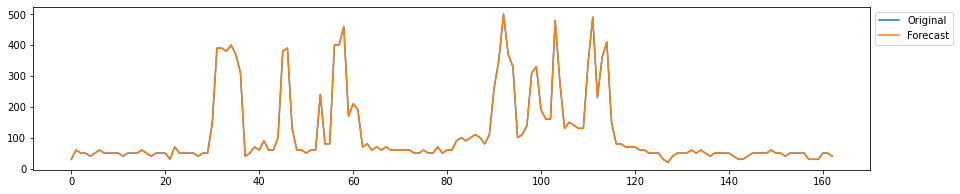

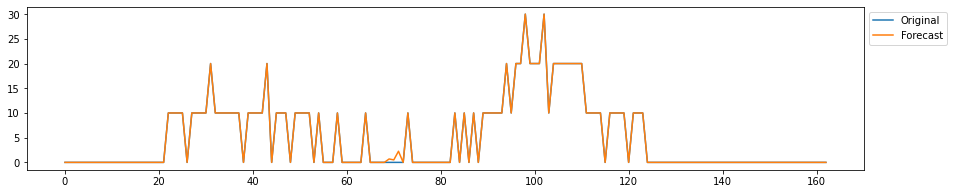

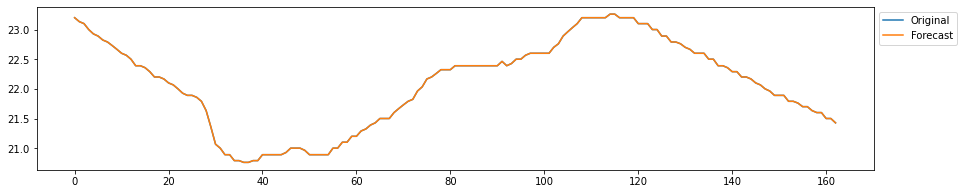

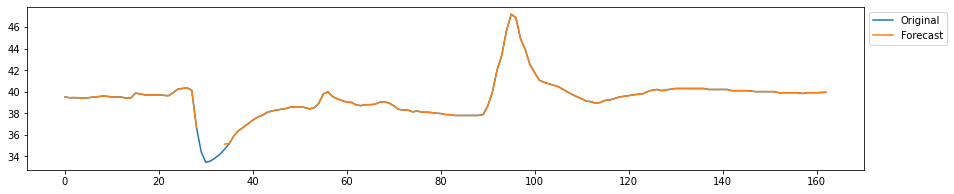

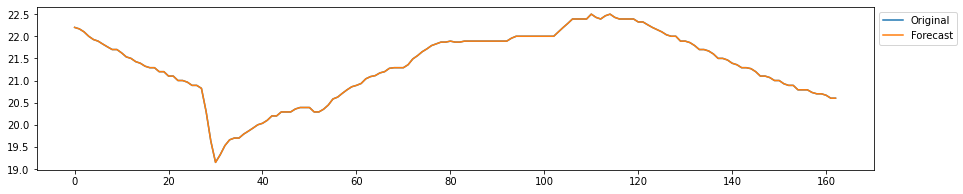

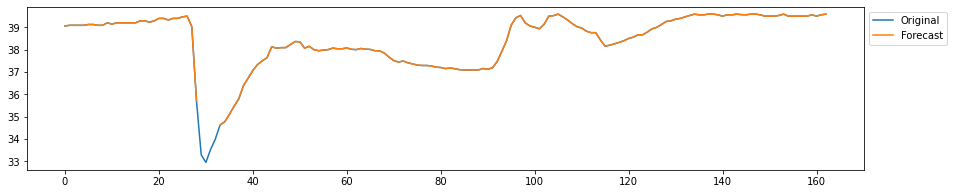

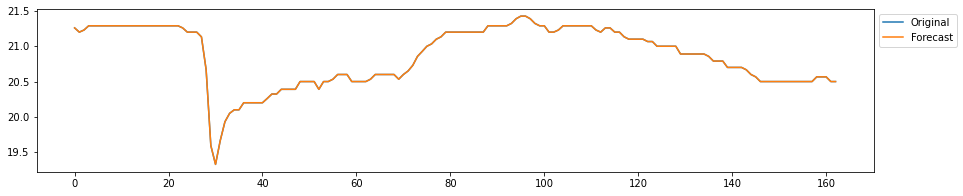

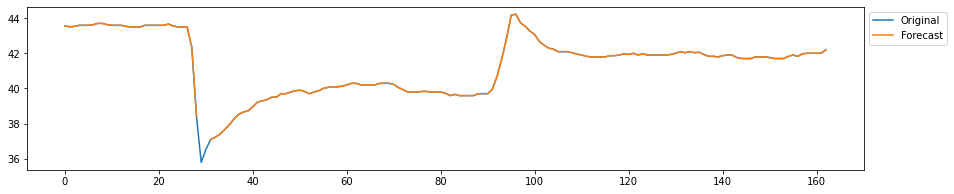

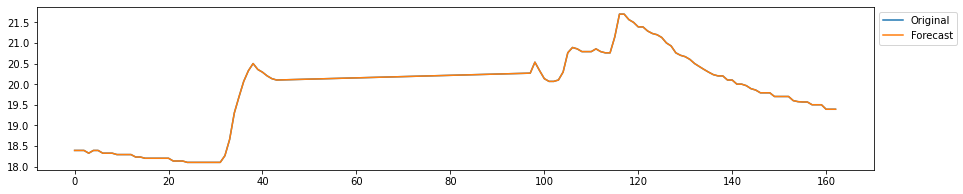

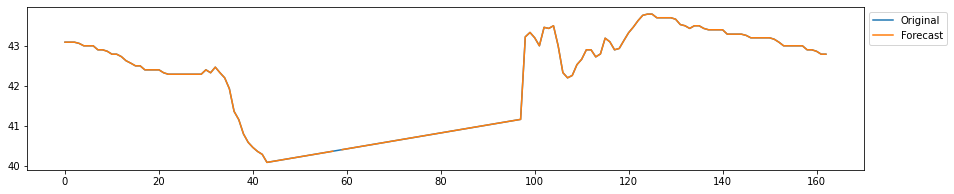

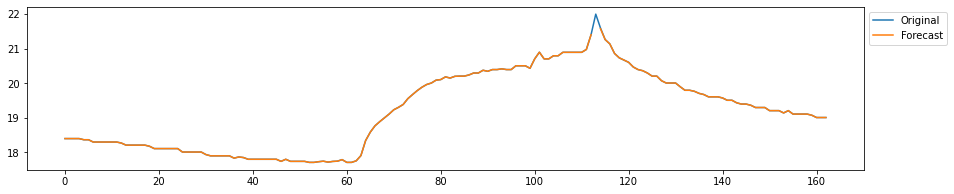

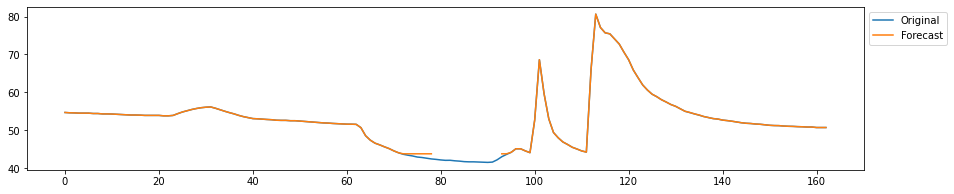

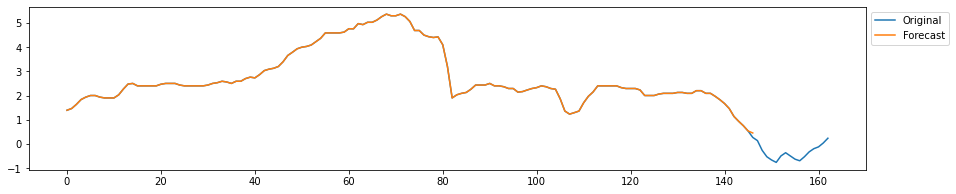

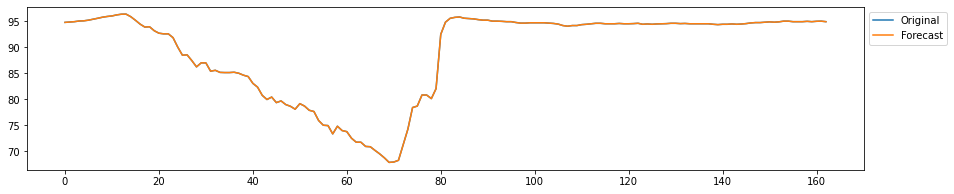

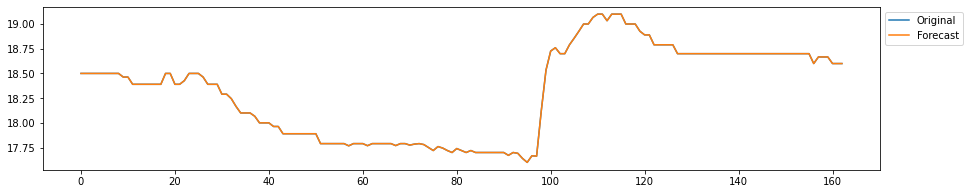

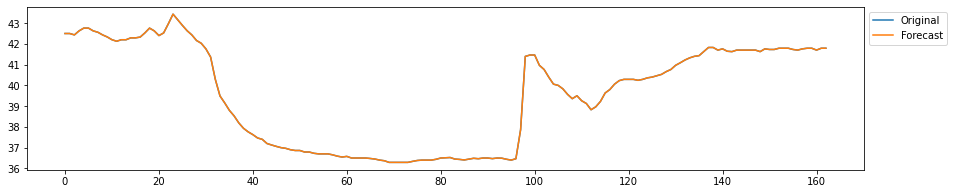

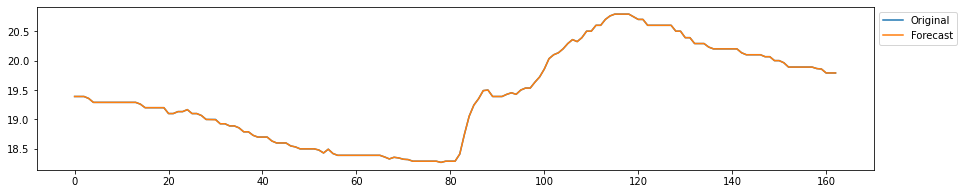

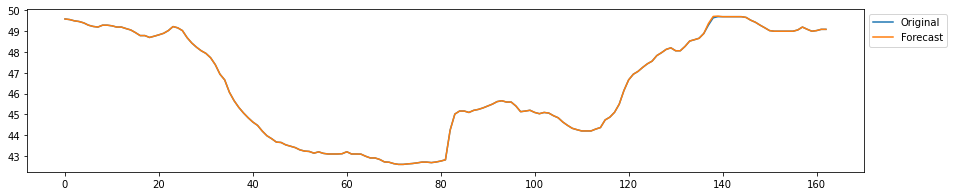

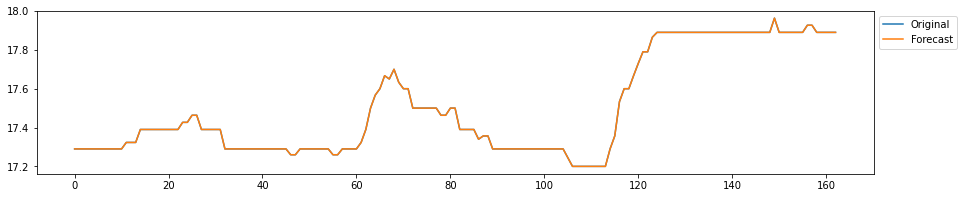

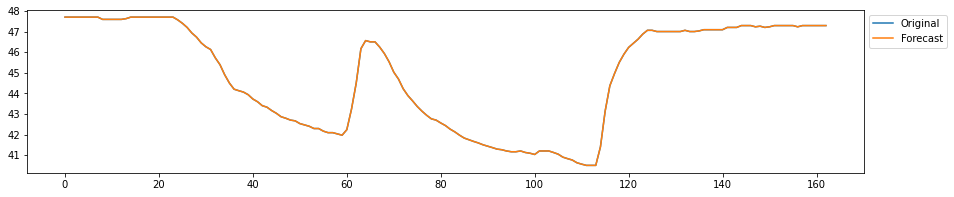

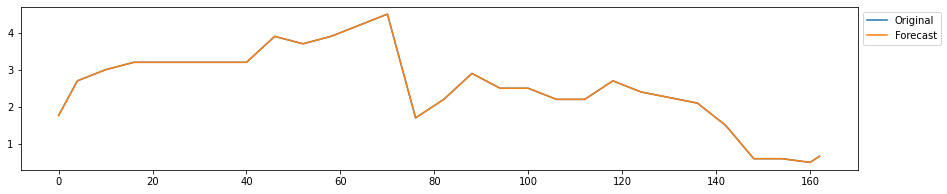

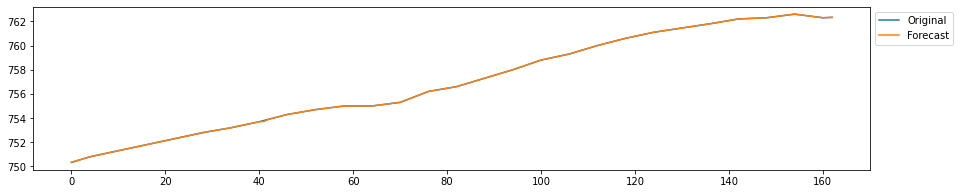

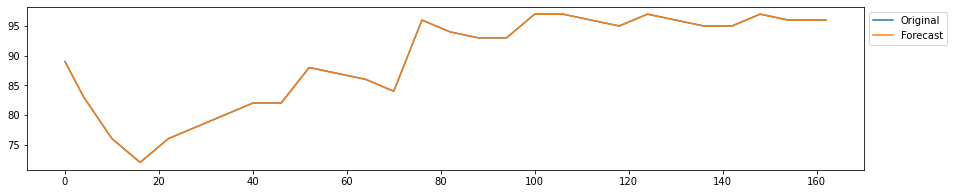

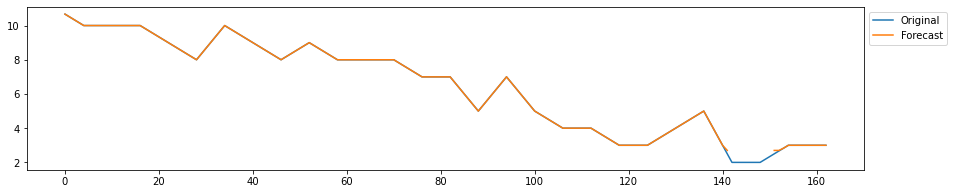

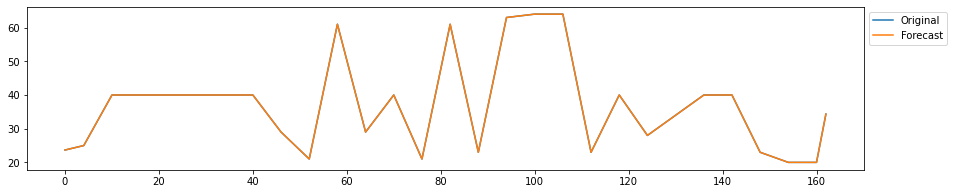

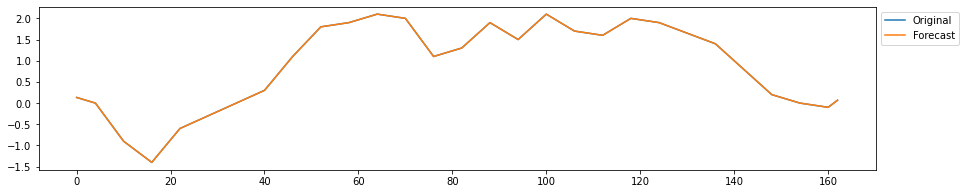

--------------------

 ===> Training window 657

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)

RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 27.4 secs 
 27.4 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> forecasting 
T1(t+1) -

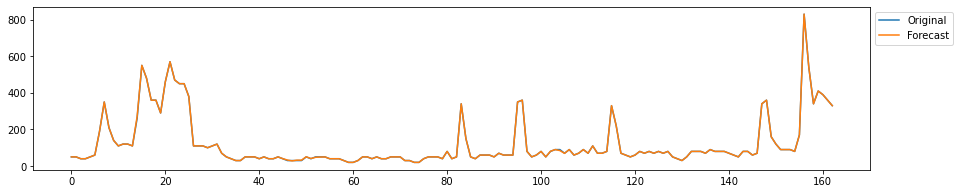

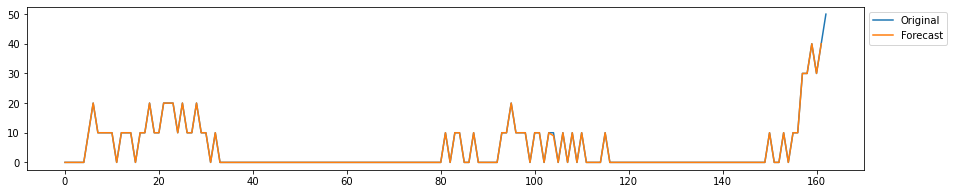

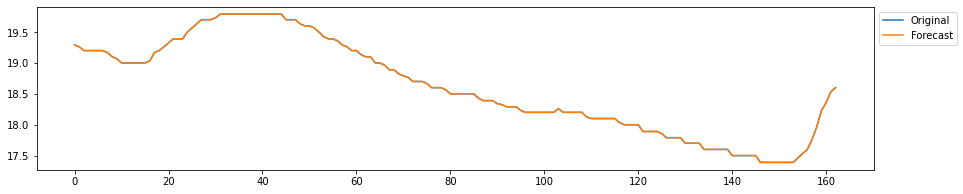

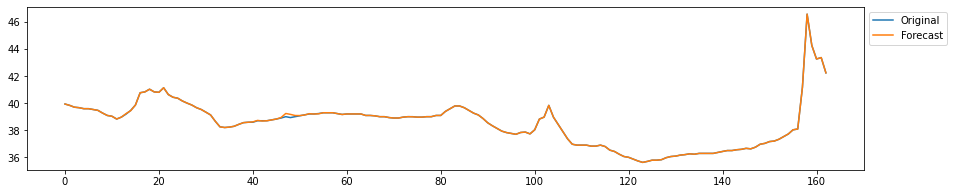

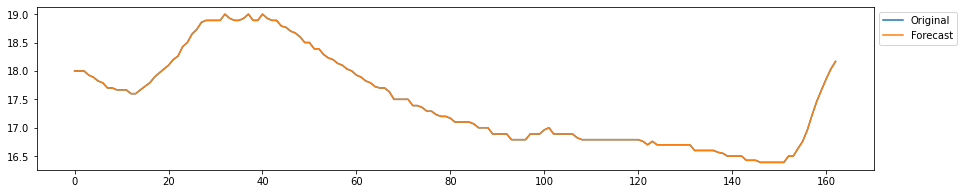

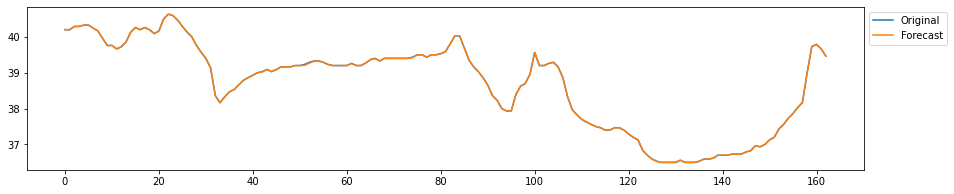

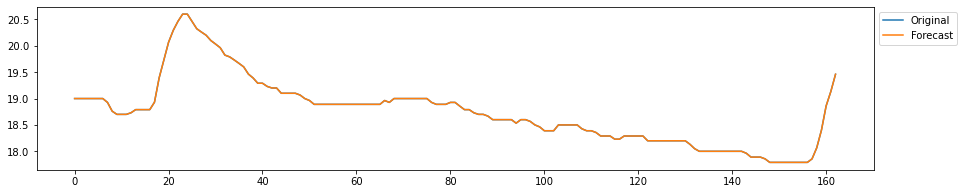

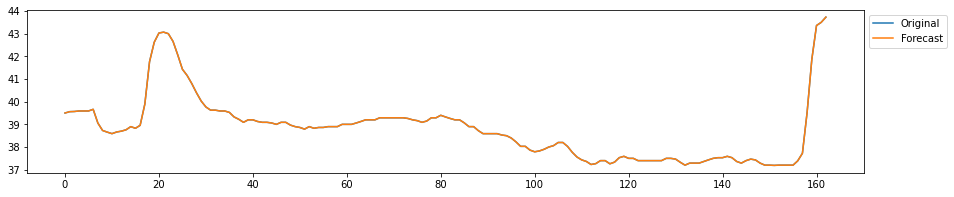

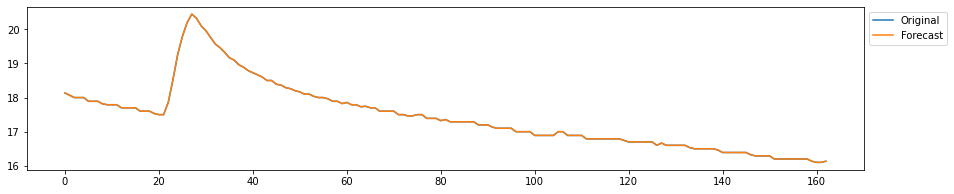

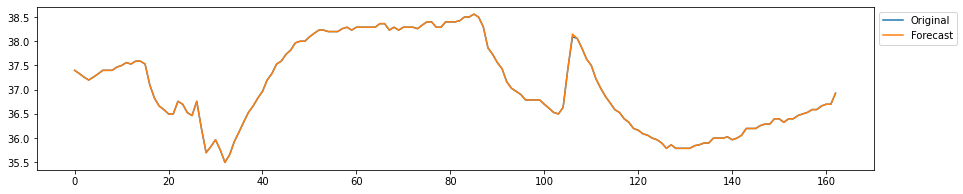

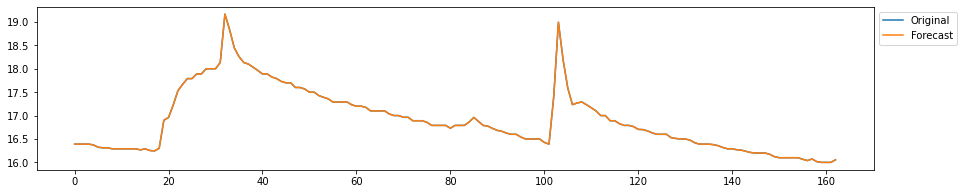

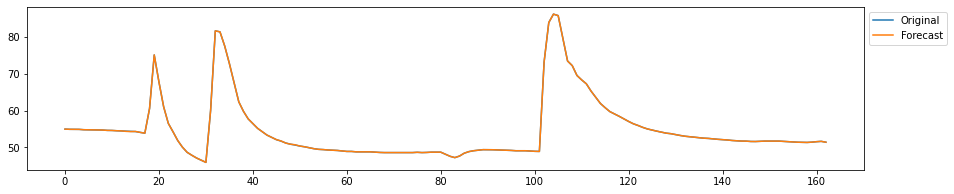

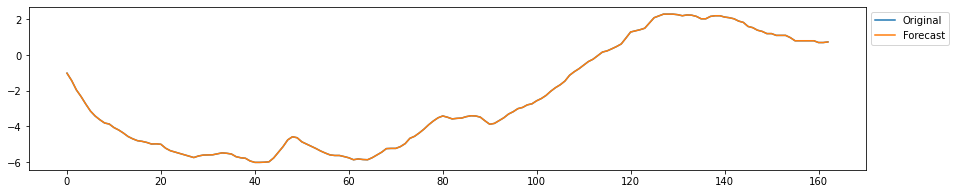

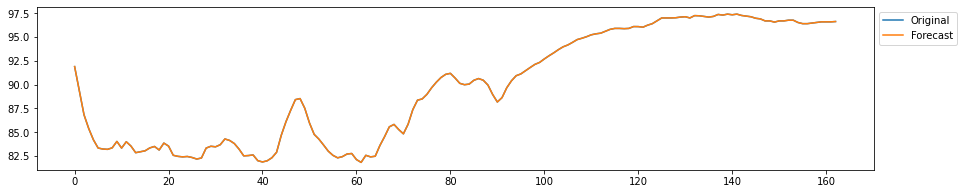

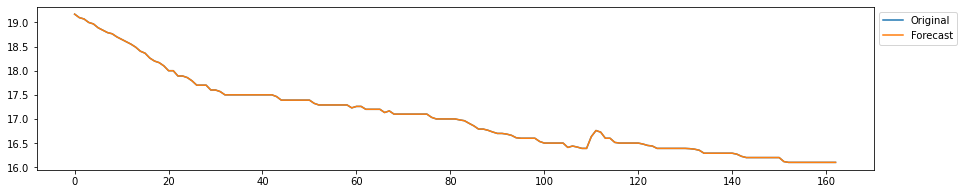

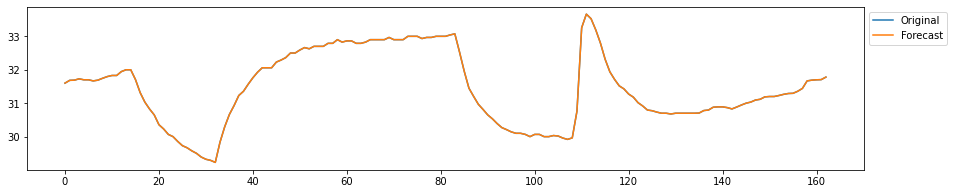

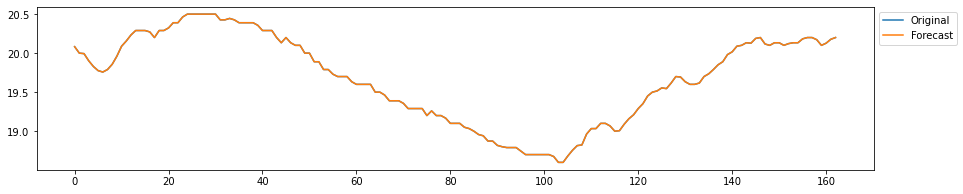

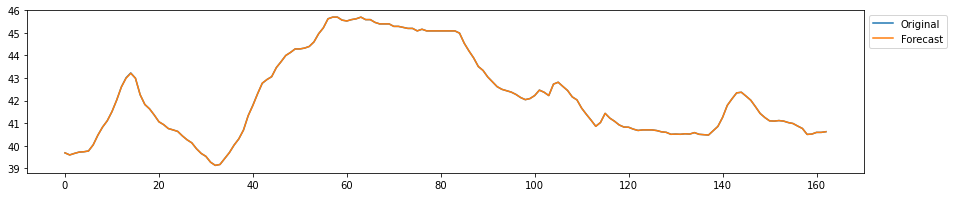

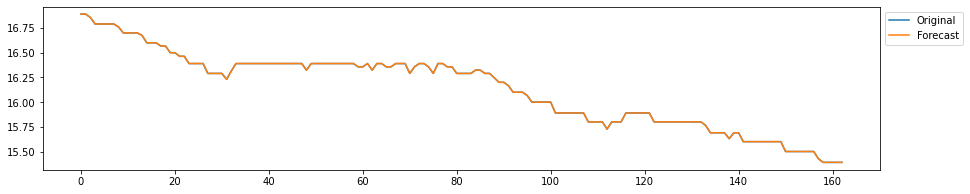

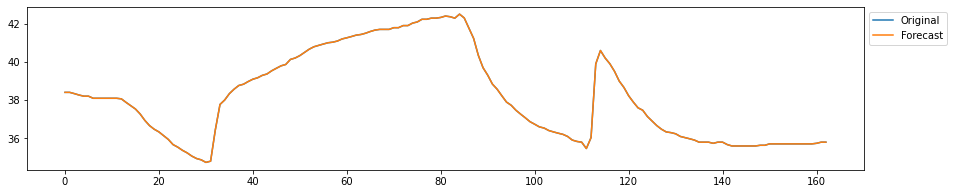

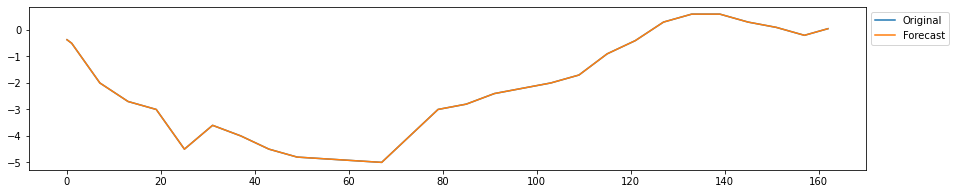

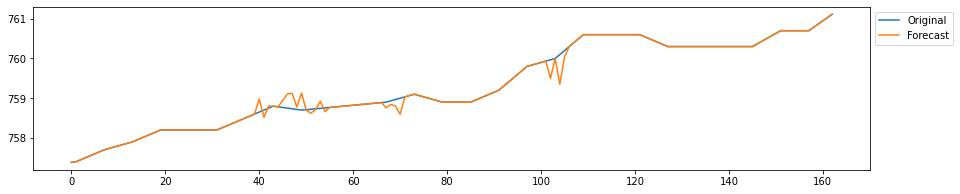

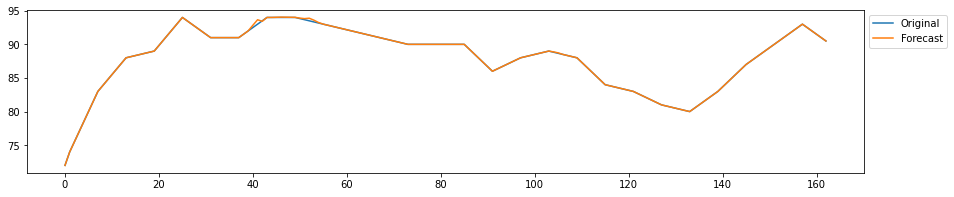

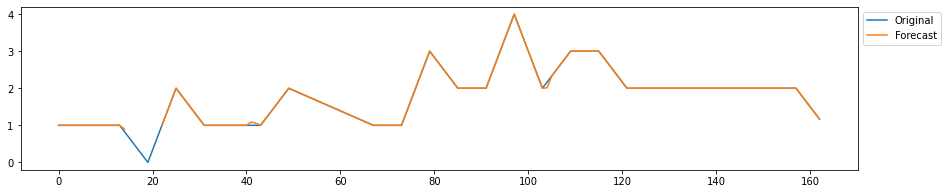

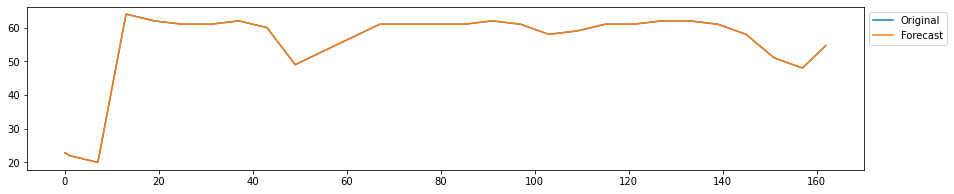

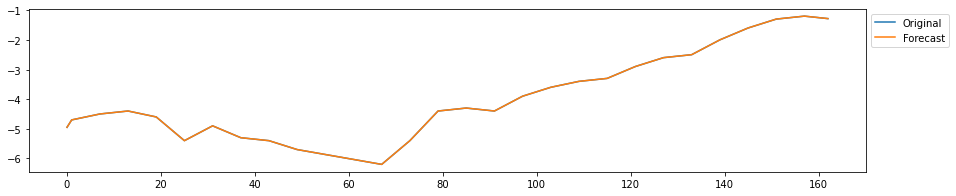

--------------------

 ===> Training window 1314

Start method learning.
 
Appliances(t+1) model (learning)lights(t+1) model (learning)

T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)

T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)Visibility(t+1) model (learning)

Tdewpoint(t+1) model (learning)

 
End method learning.
 
 27.4 secs 
 27.4 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target
T1(t+1) --> f

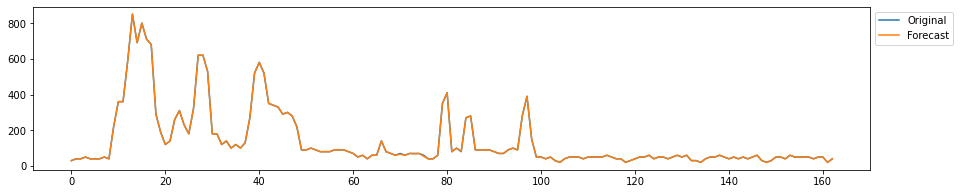

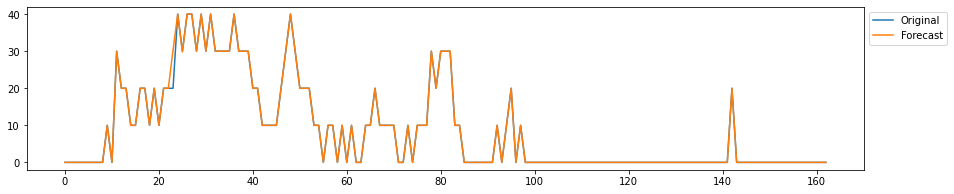

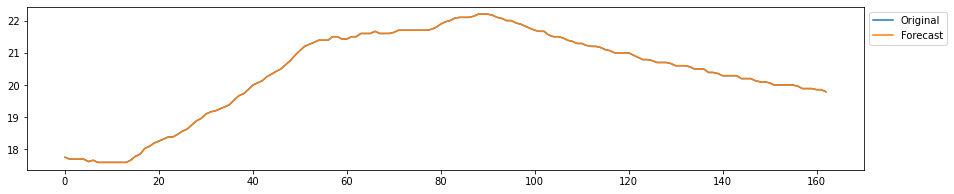

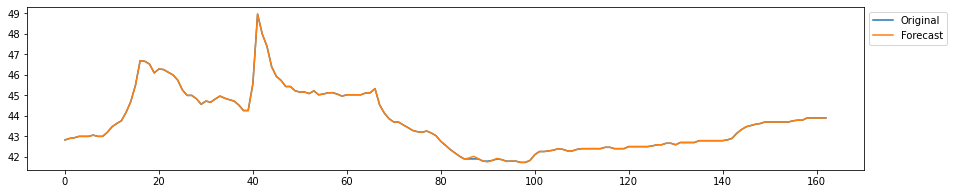

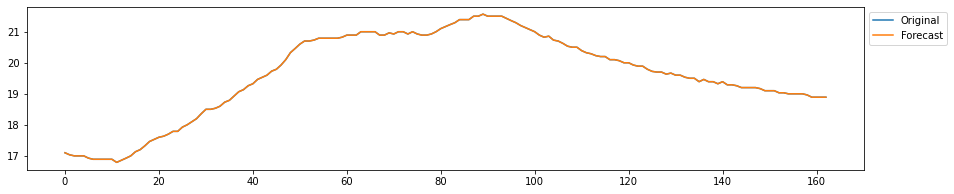

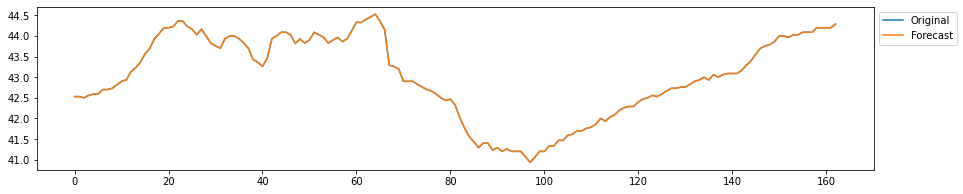

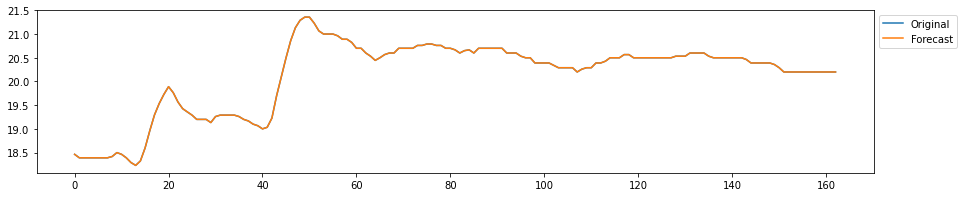

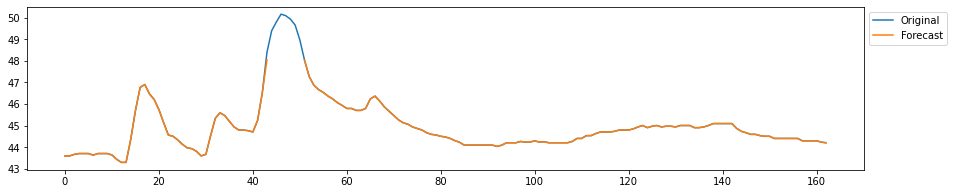

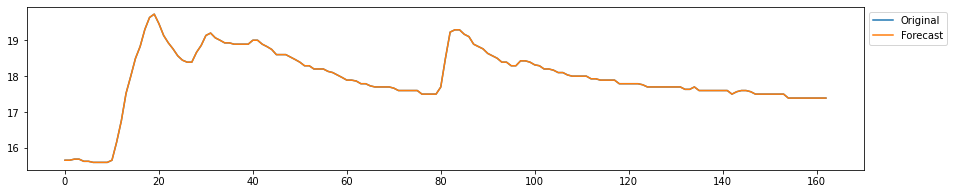

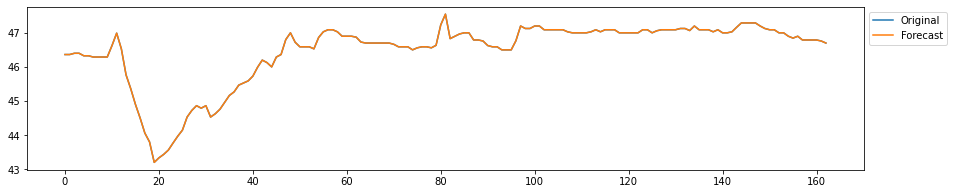

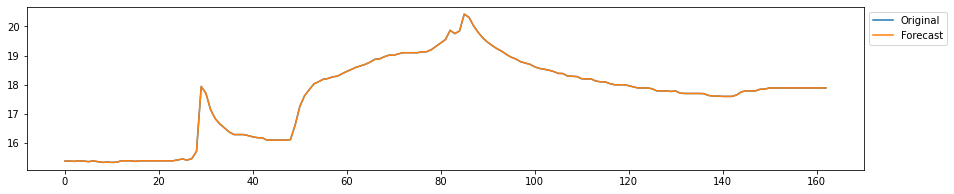

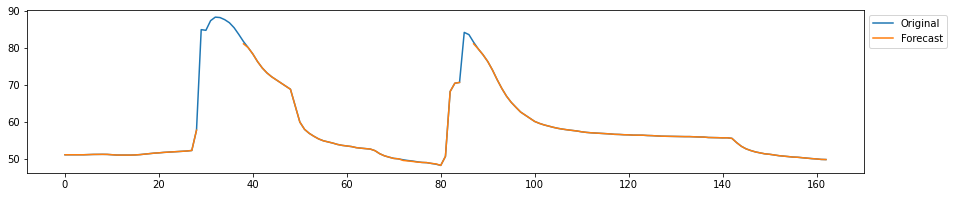

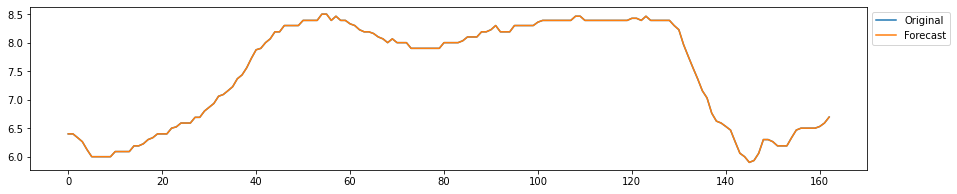

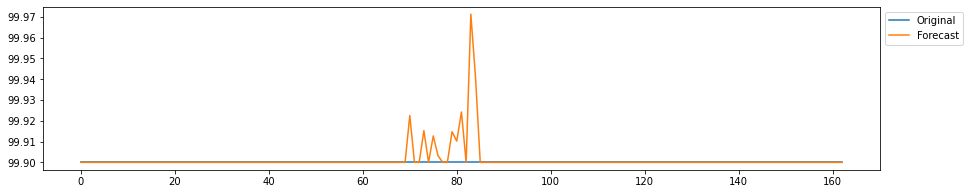

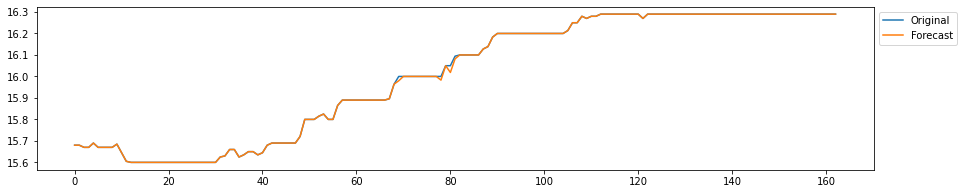

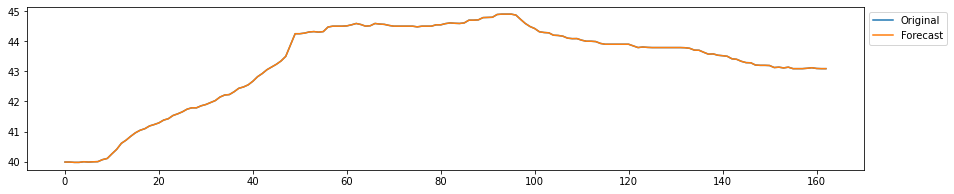

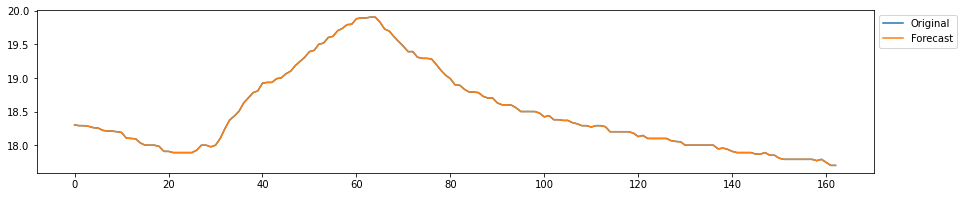

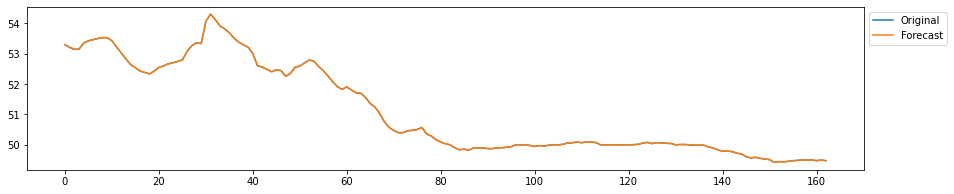

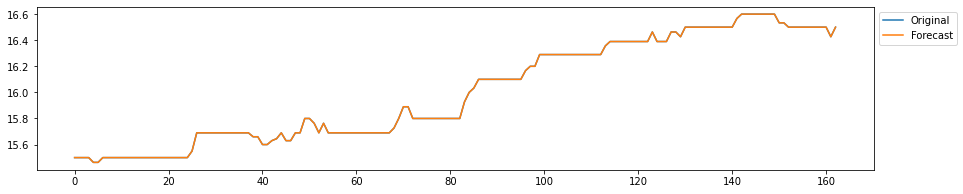

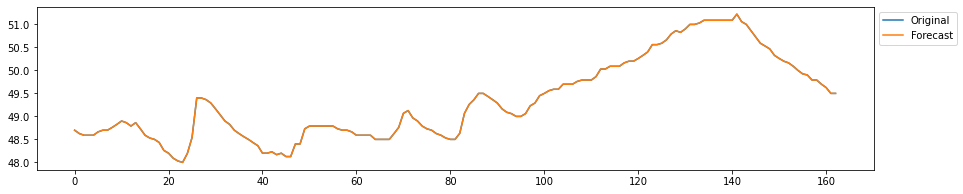

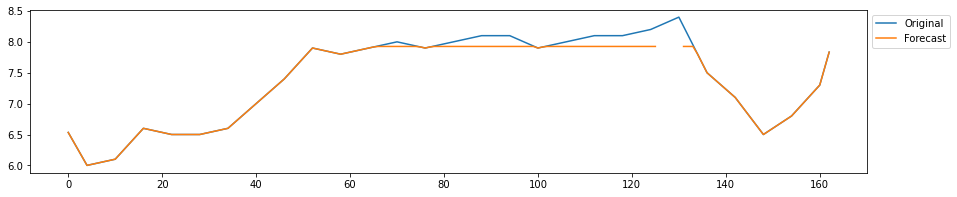

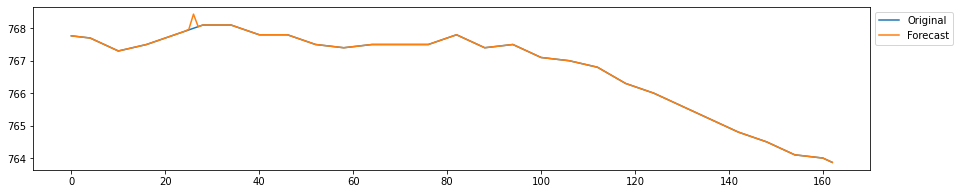

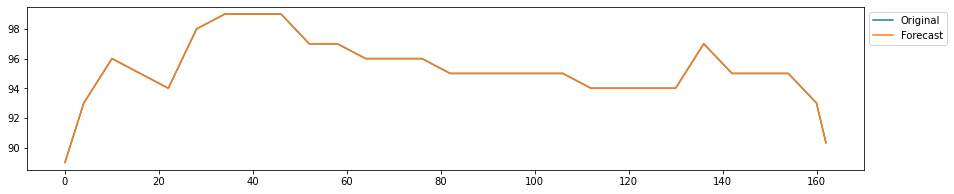

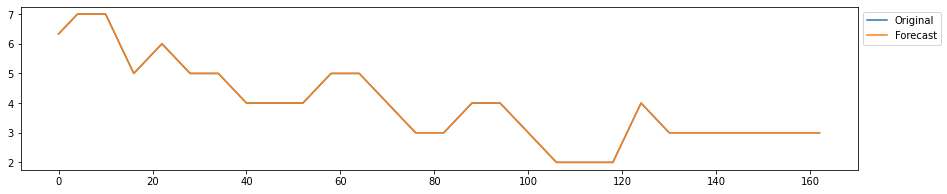

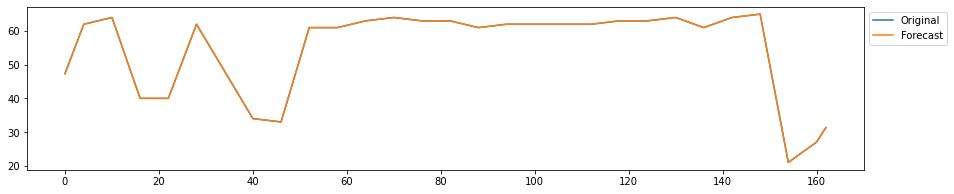

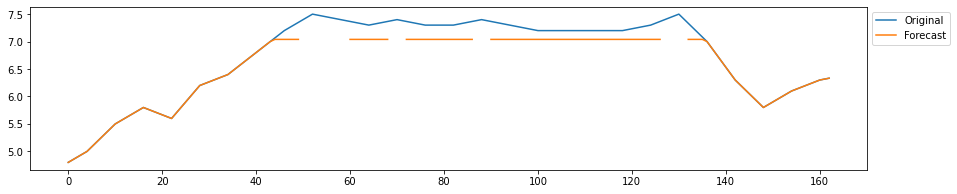

--------------------

 ===> Training window 1971

Start method learning.
 
Appliances(t+1) model (learning)lights(t+1) model (learning)

T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)RH_3(t+1) model (learning)

T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)RH_6(t+1) model (learning)

T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)RH_9(t+1) model (learning)

T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)RH_out(t+1) model (learning)

Windspeed(t+1) model (learning)Visibility(t+1) model (learning)Tdewpoint(t+1) model (learning)


 
End method learning.
 
 26.1 secs 
 26.1 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target

Appliances(t

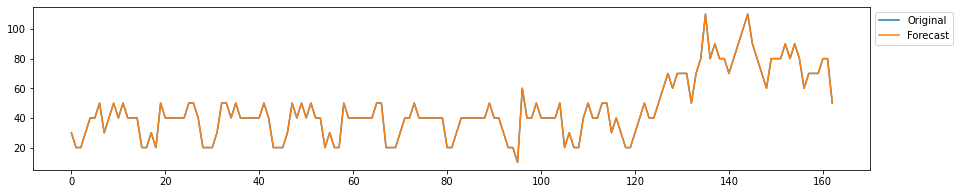

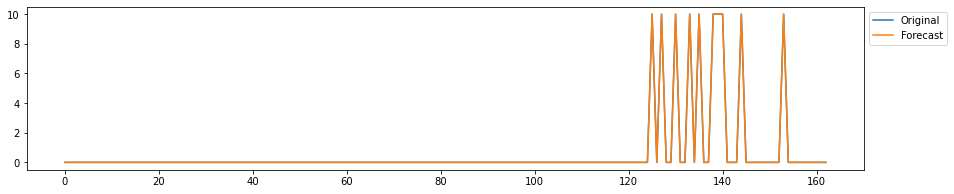

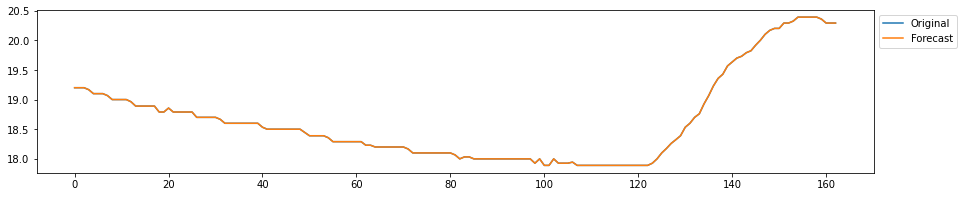

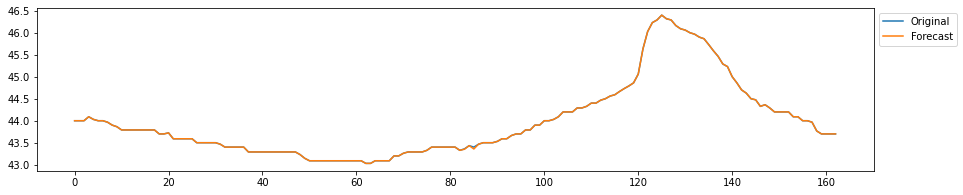

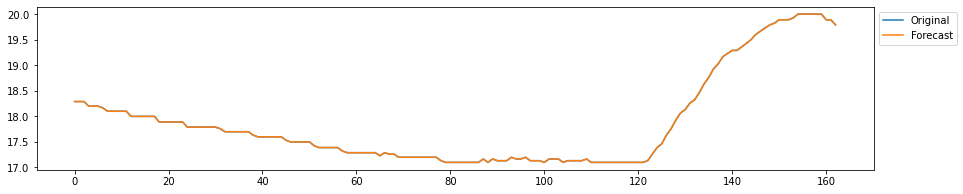

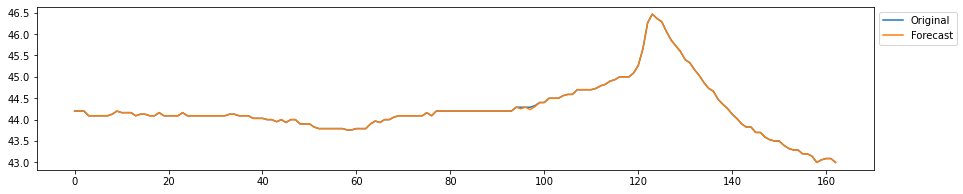

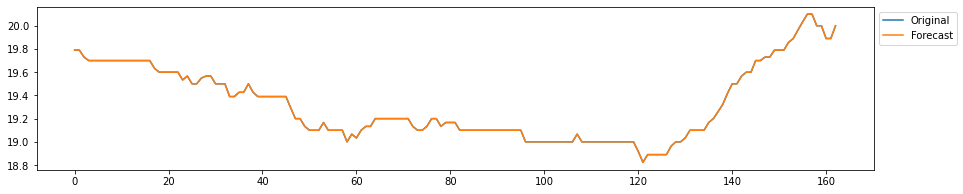

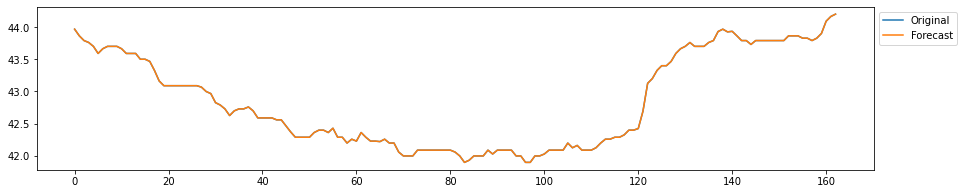

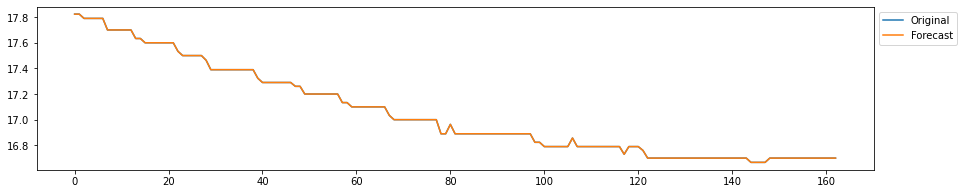

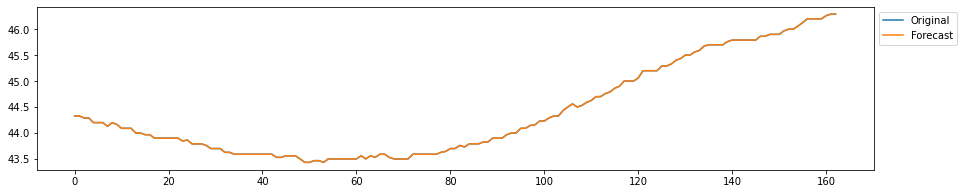

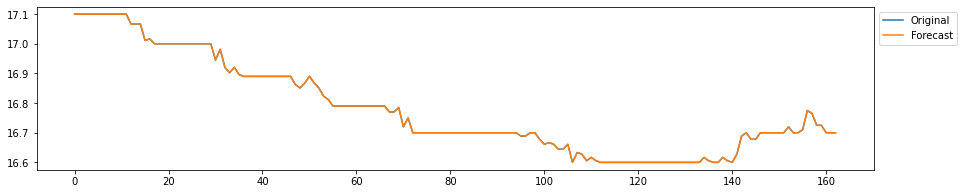

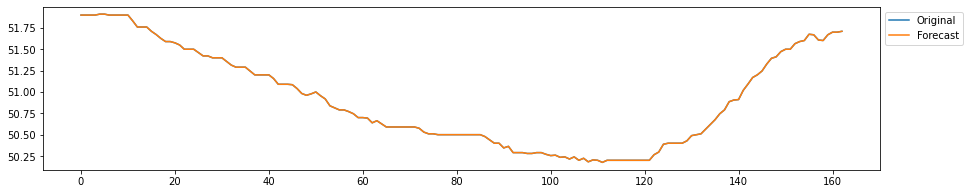

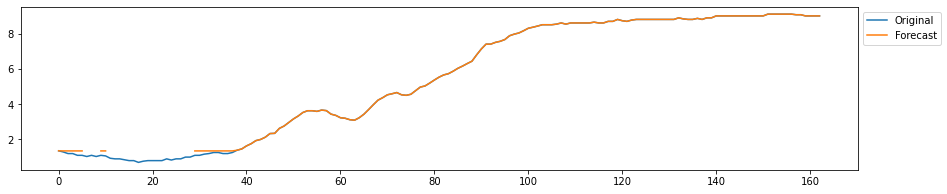

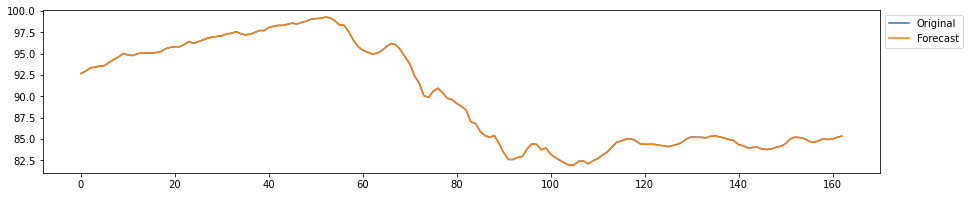

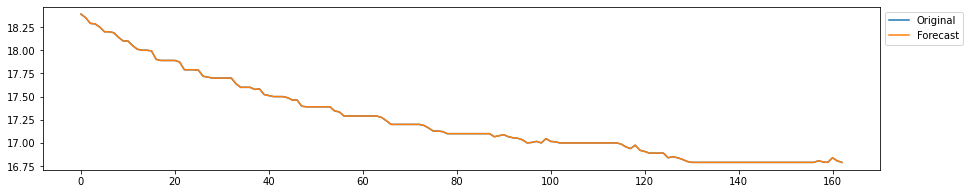

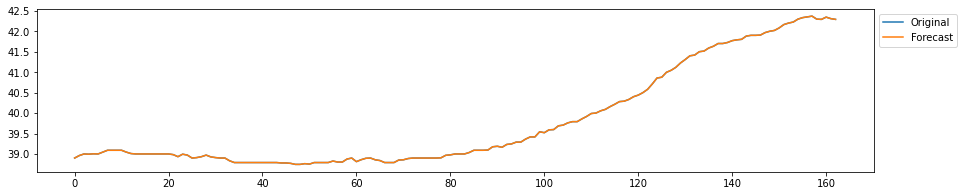

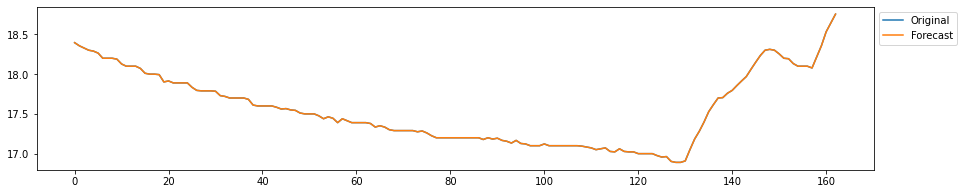

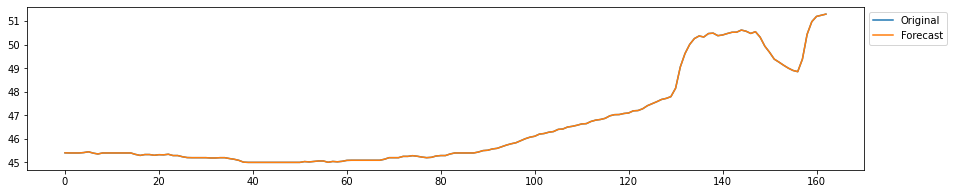

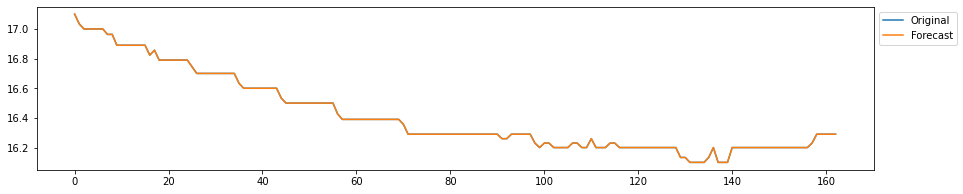

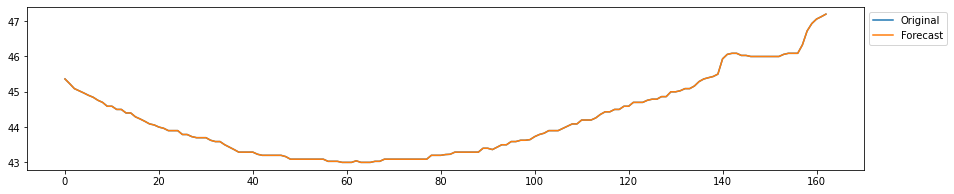

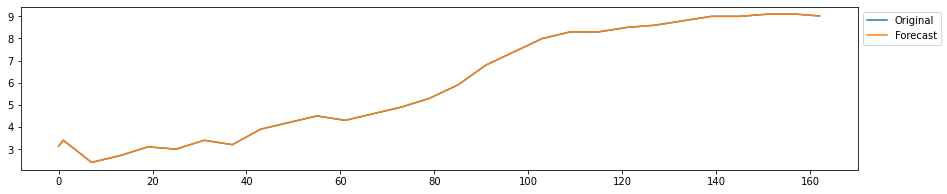

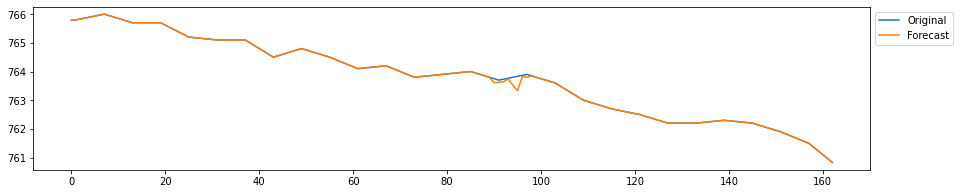

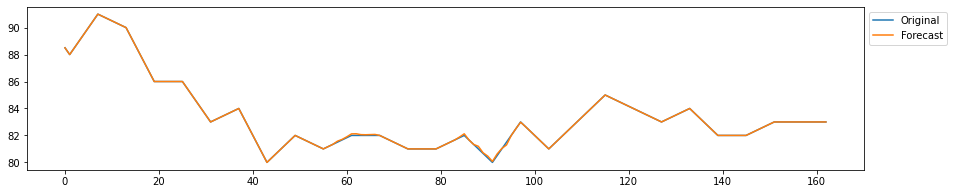

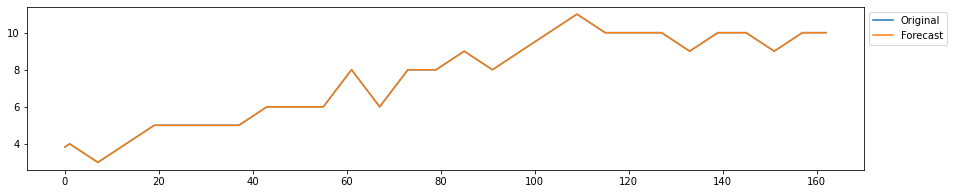

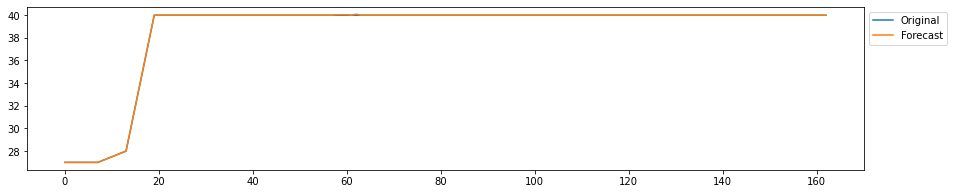

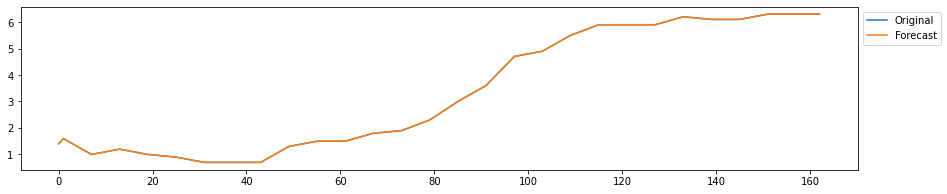

--------------------

 ===> Training window 2628

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)


Tdewpoint(t+1) model (learning)
 
End method learning.
 
 27.2 secs 
 27.2 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> forecasting 
lights(t

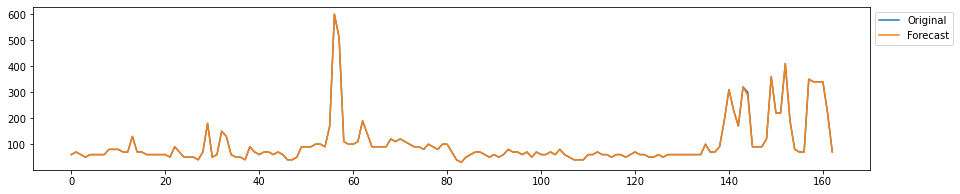

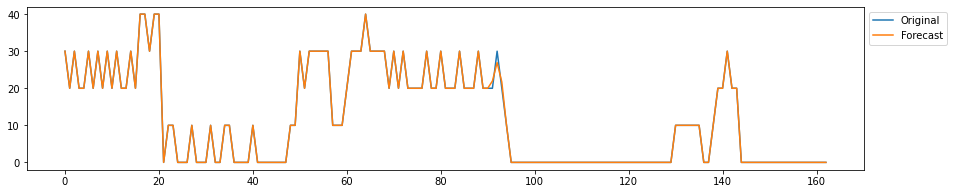

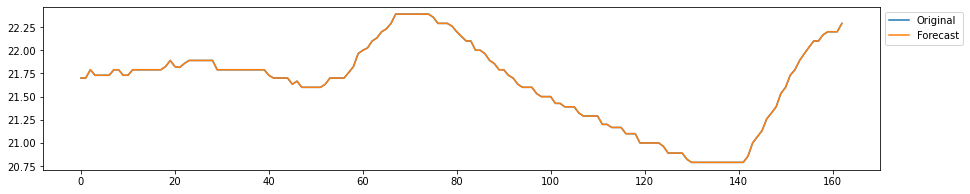

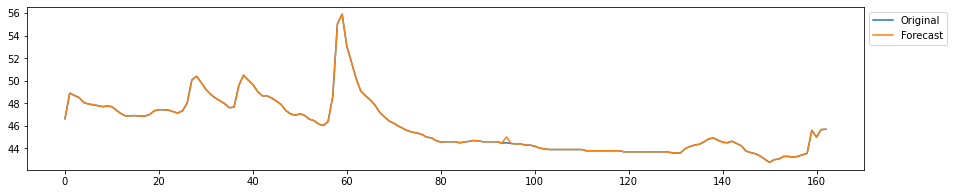

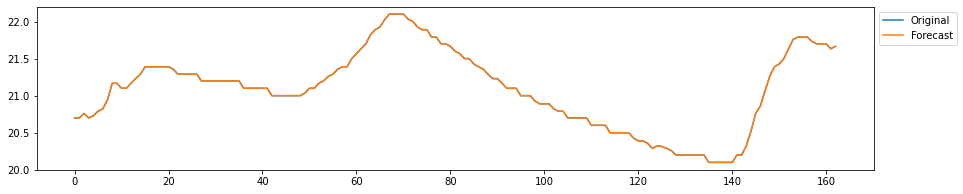

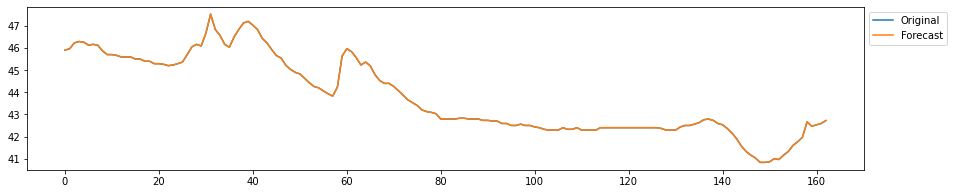

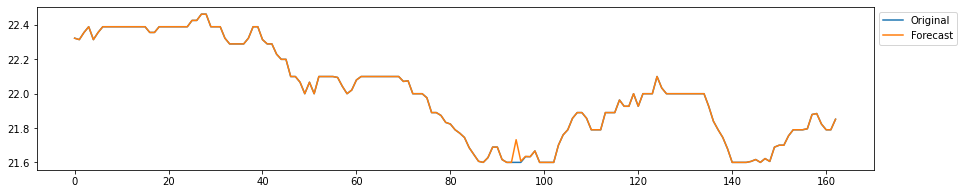

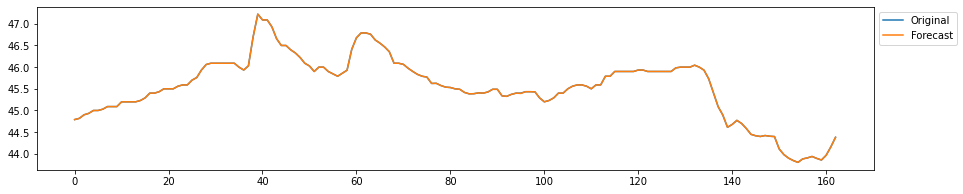

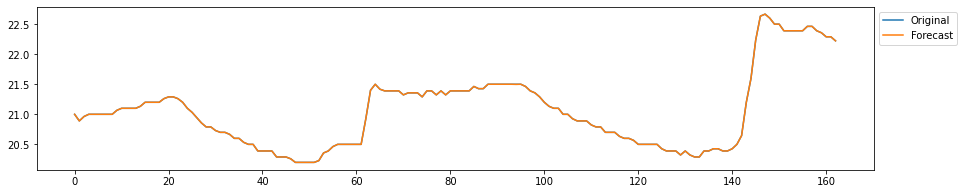

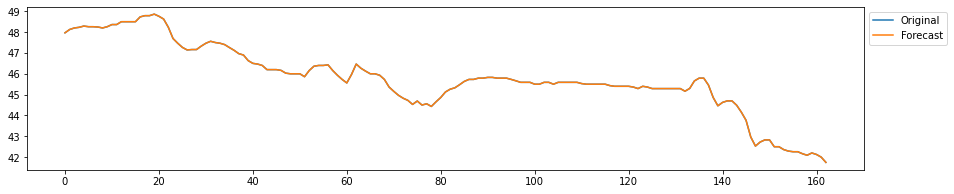

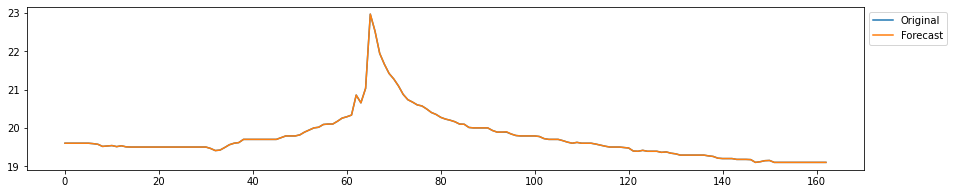

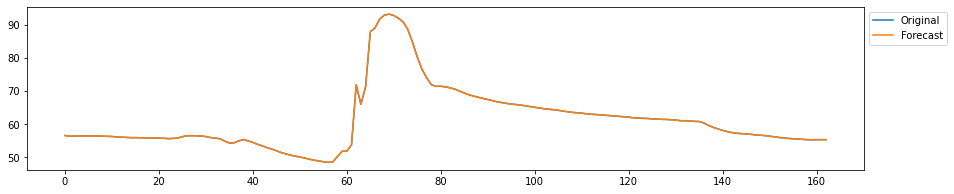

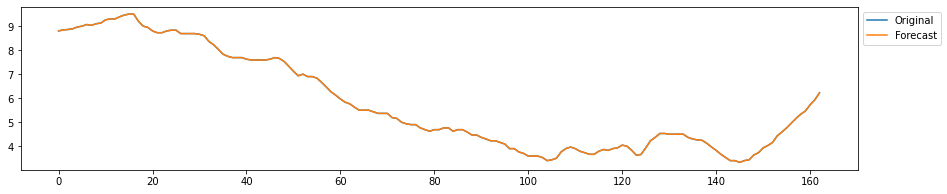

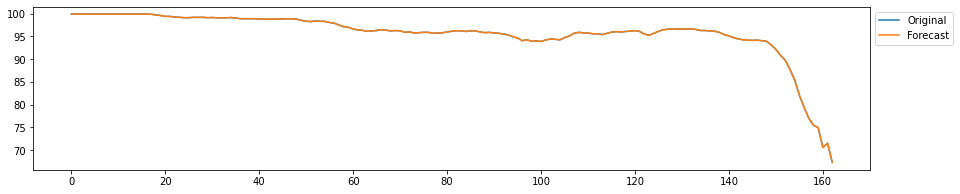

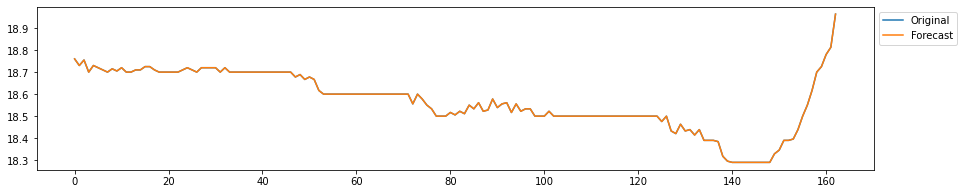

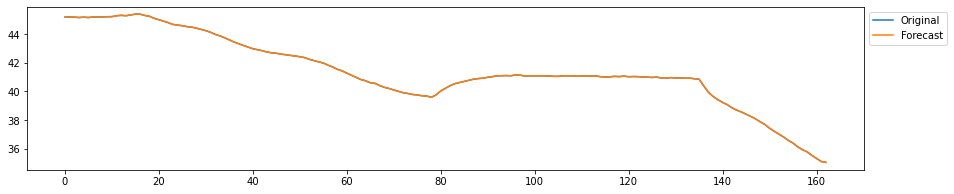

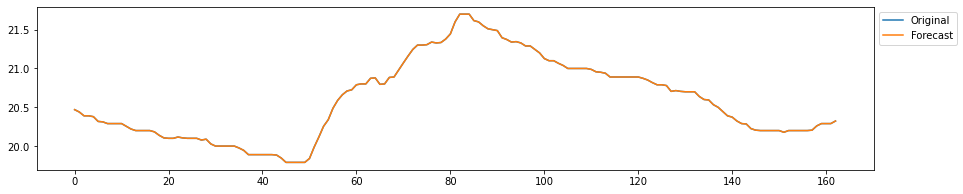

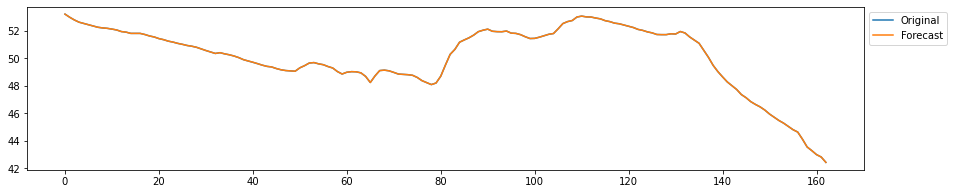

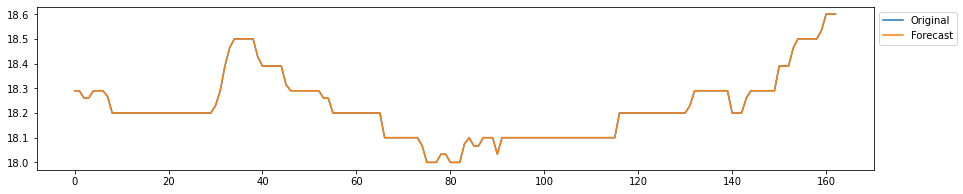

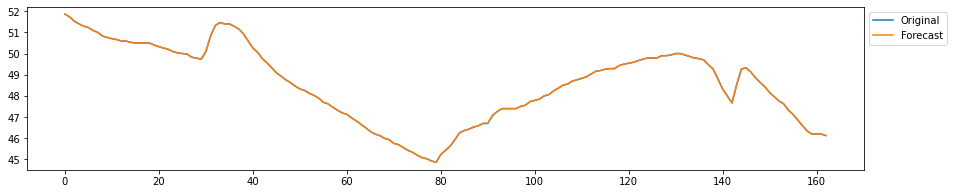

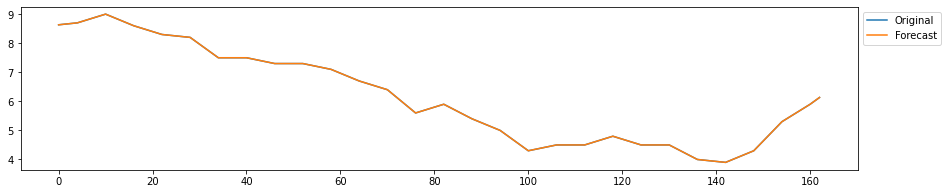

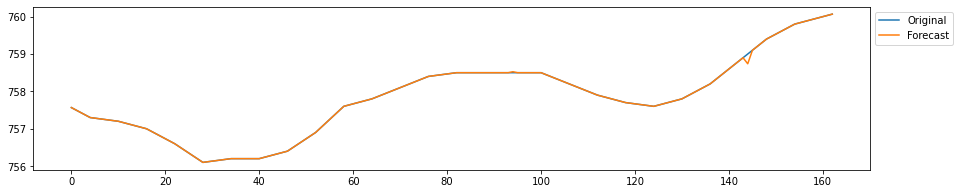

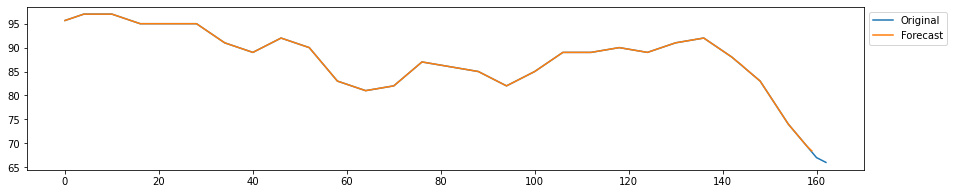

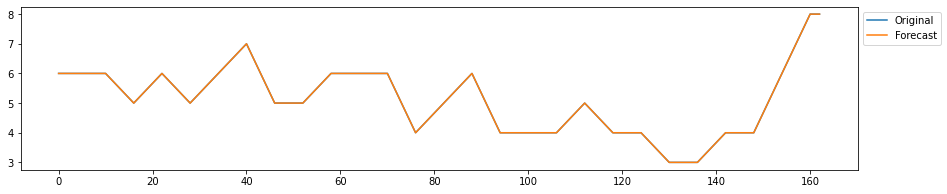

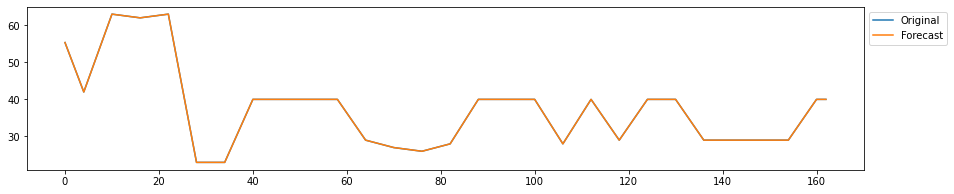

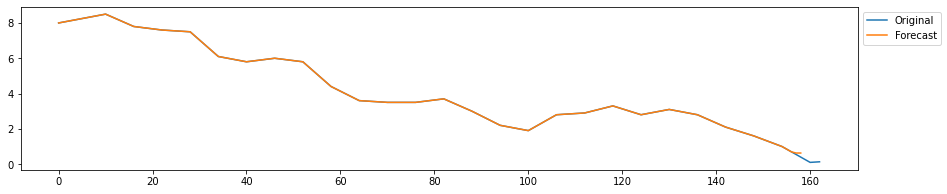

--------------------

 ===> Training window 3285

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)

RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)Tdewpoint(t+1) model (learning)

 
End method learning.
 
 29.4 secs 
 29.4 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target

Appliances(t

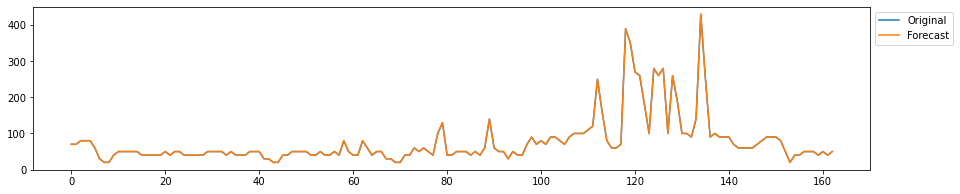

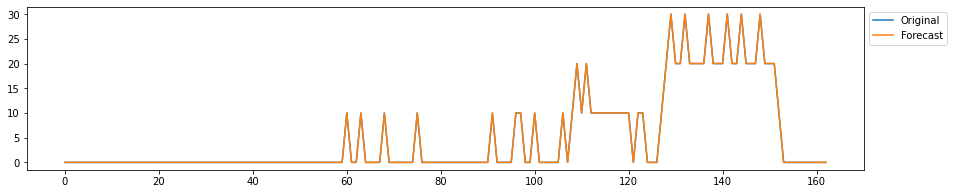

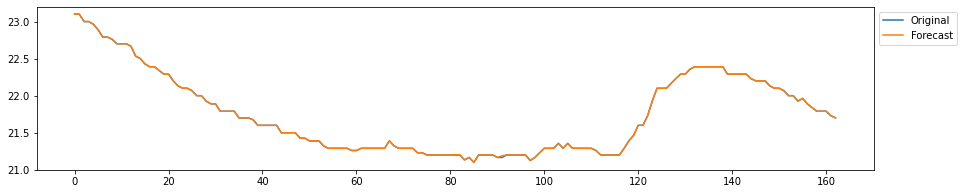

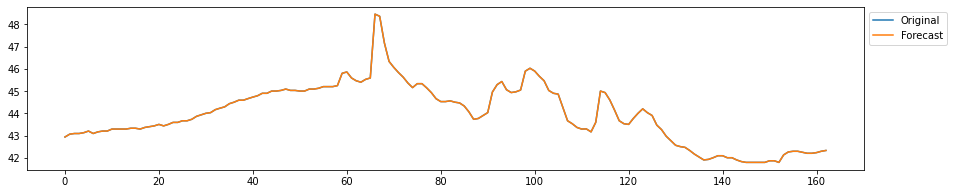

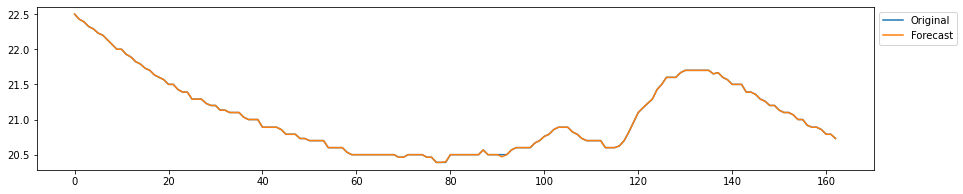

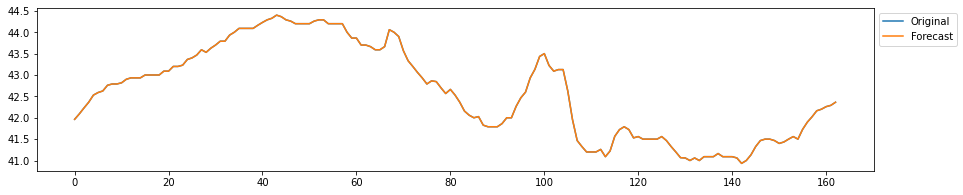

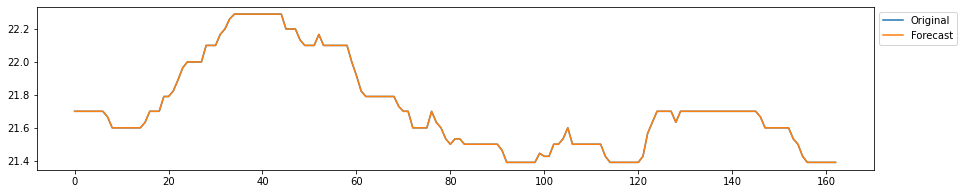

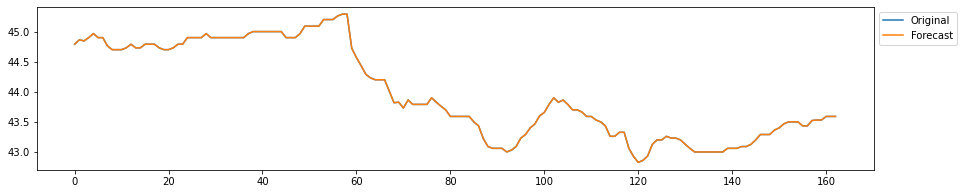

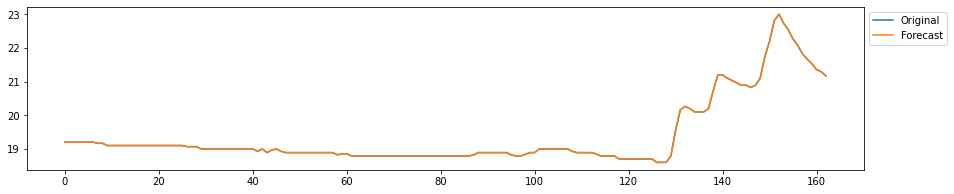

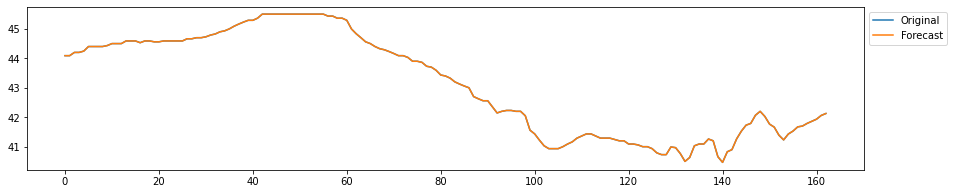

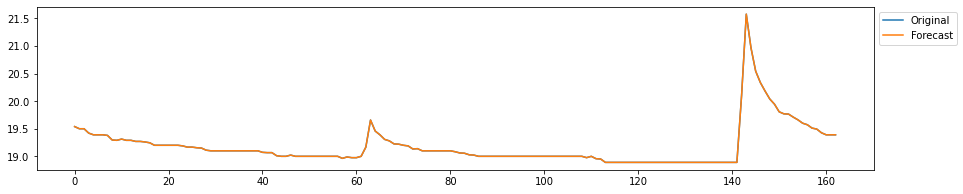

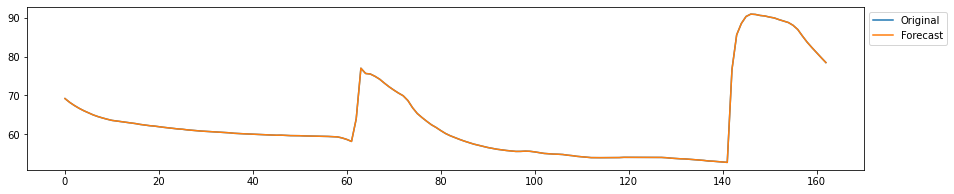

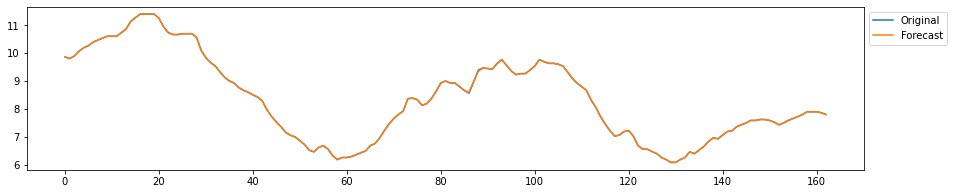

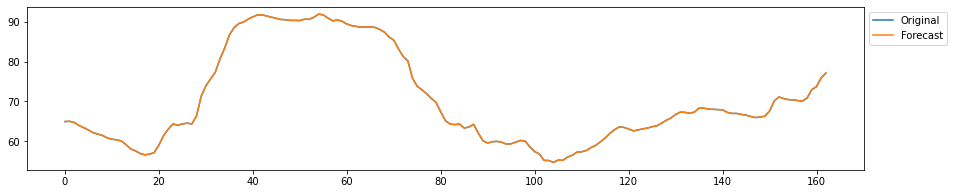

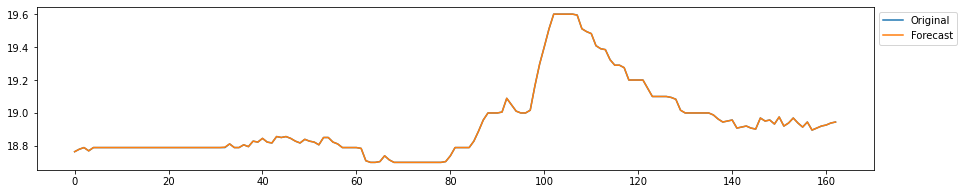

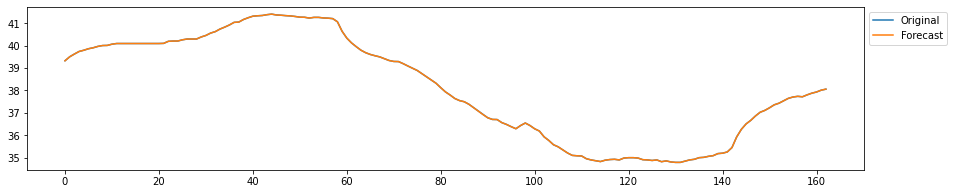

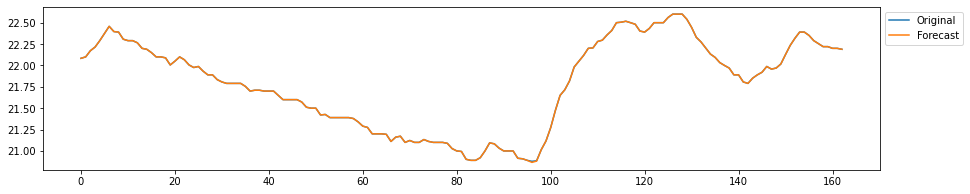

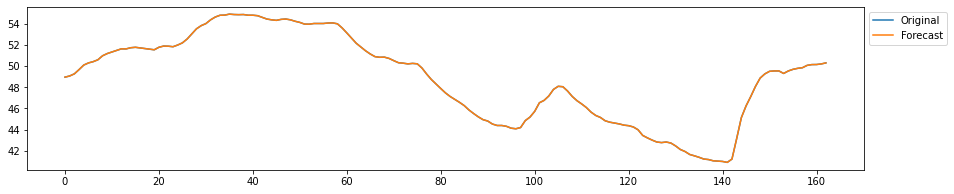

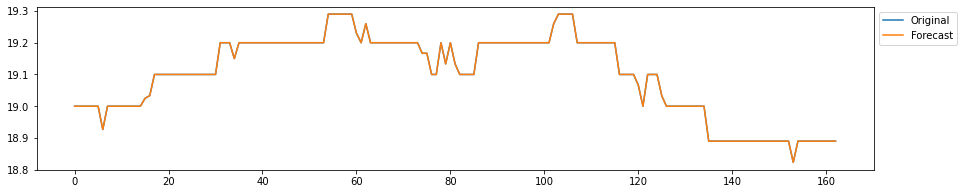

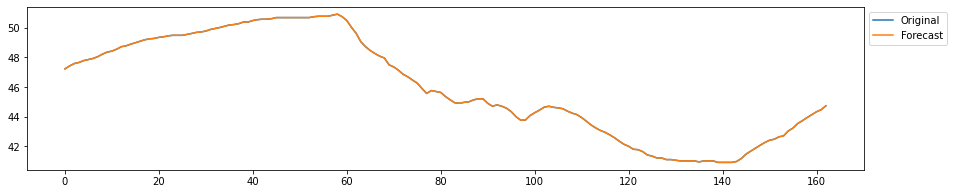

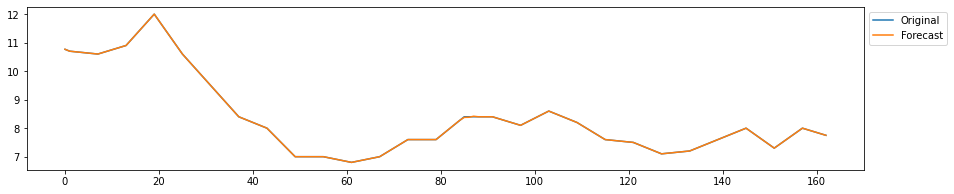

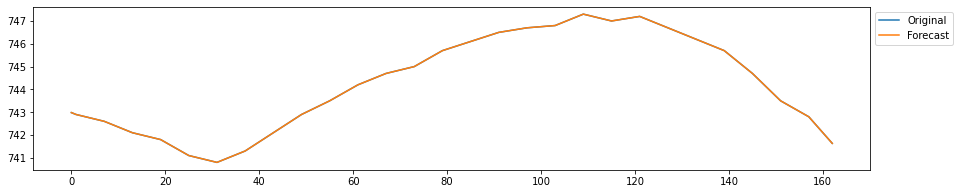

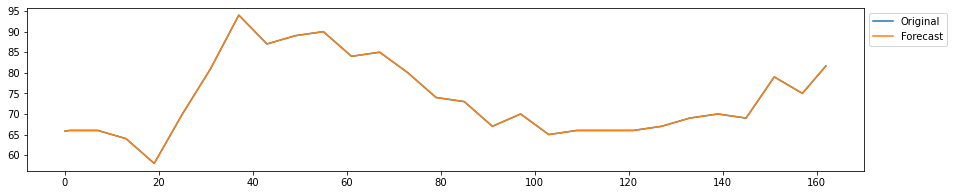

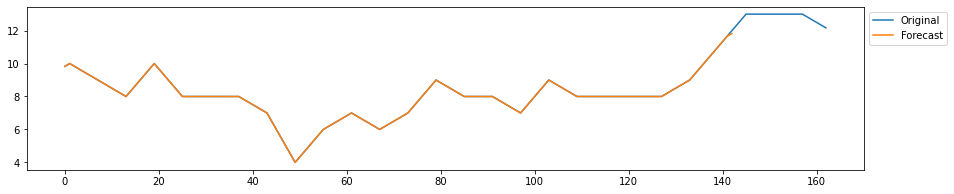

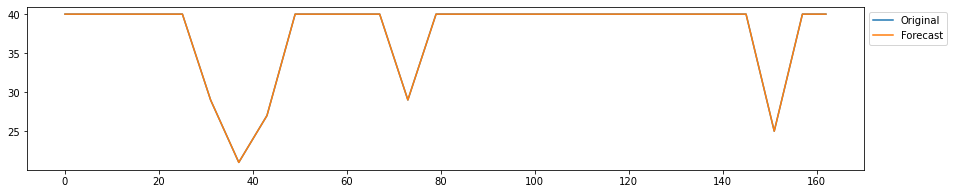

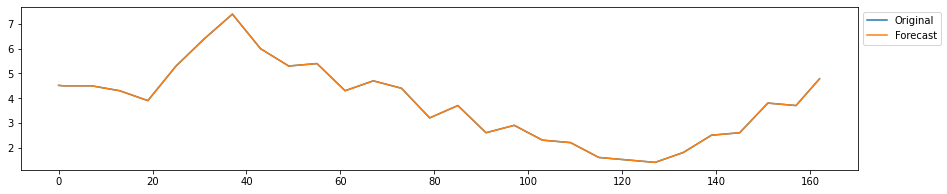

--------------------

 ===> Training window 3942

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)RH_3(t+1) model (learning)
T4(t+1) model (learning)

RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)RH_7(t+1) model (learning)
T8(t+1) model (learning)

RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)RH_out(t+1) model (learning)

Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 33.4 secs 
 33.4 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> forecasting 
lights(t

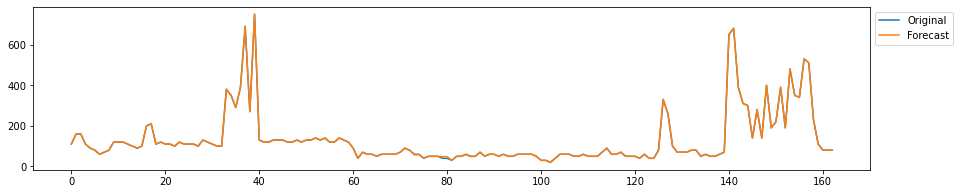

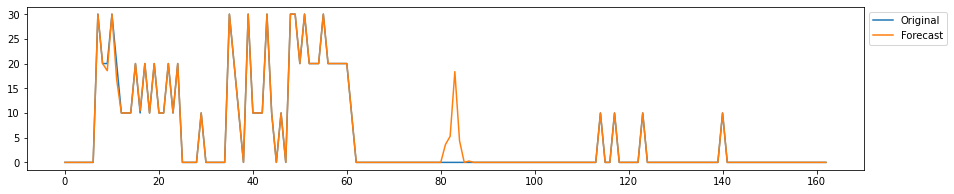

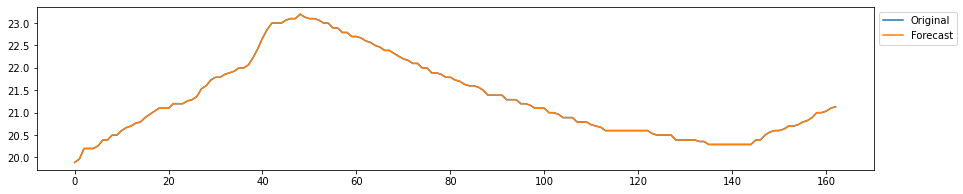

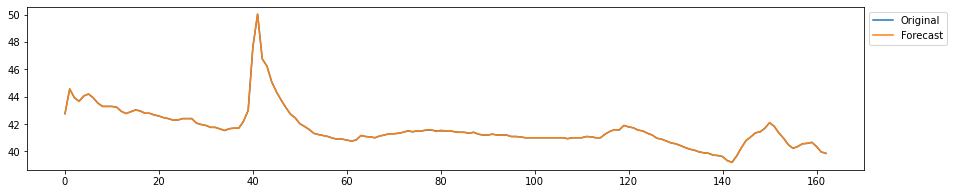

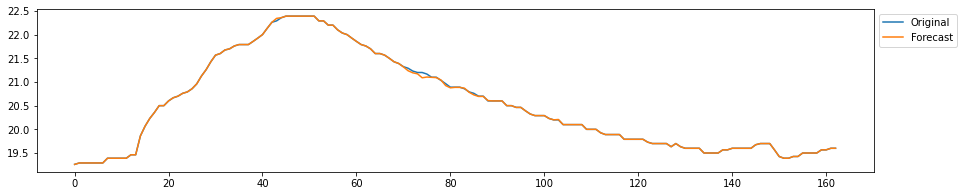

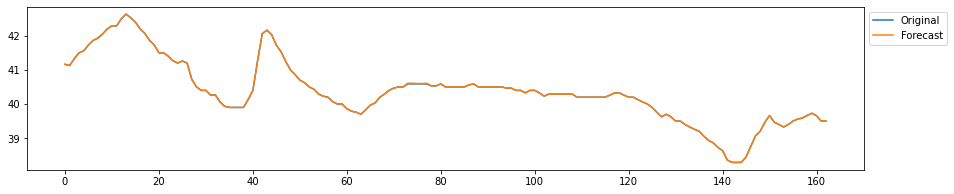

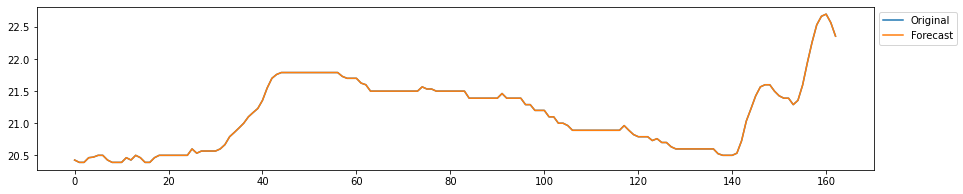

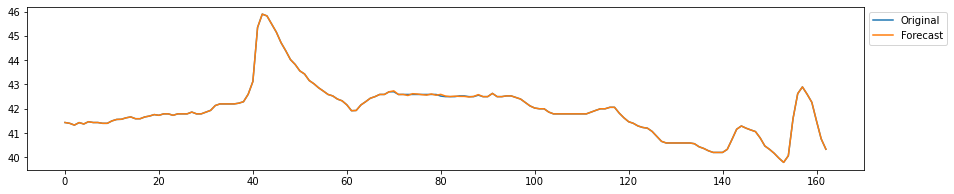

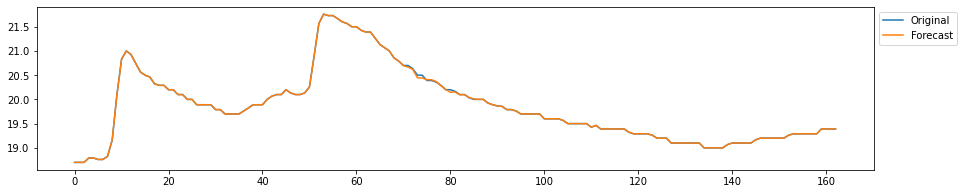

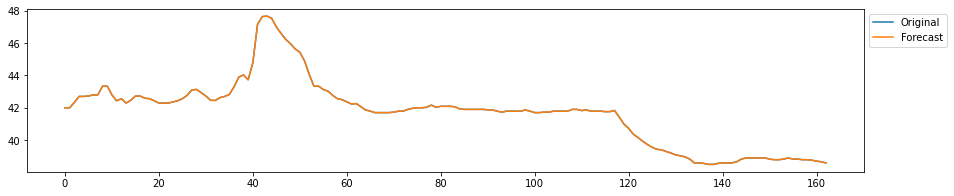

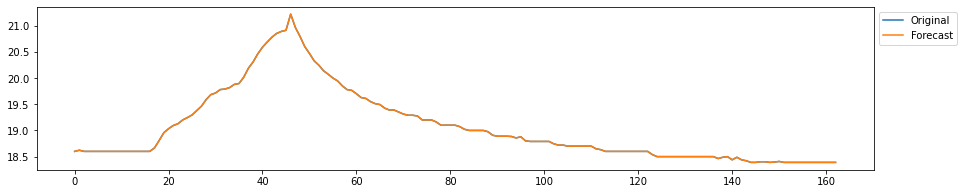

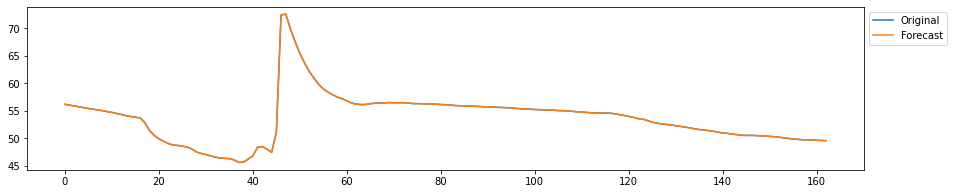

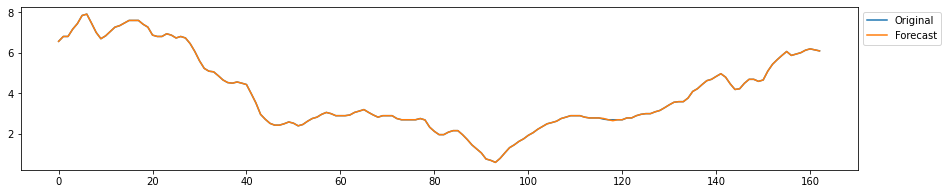

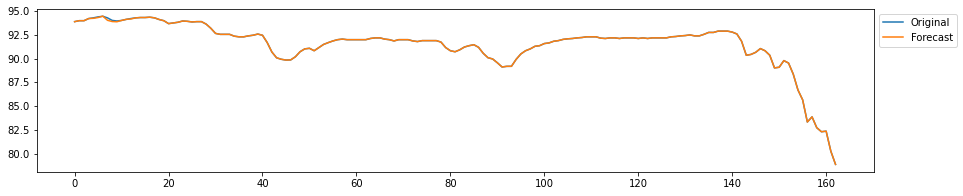

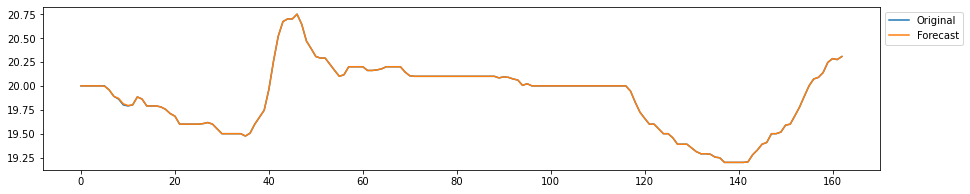

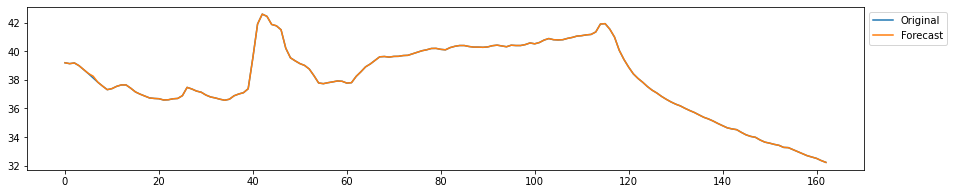

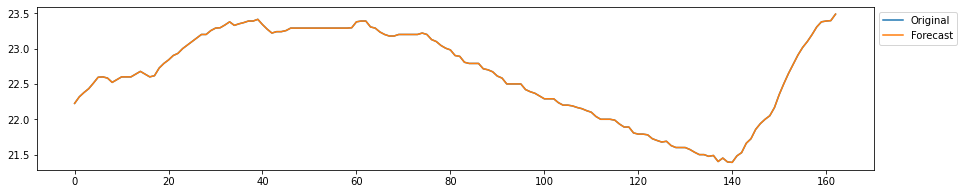

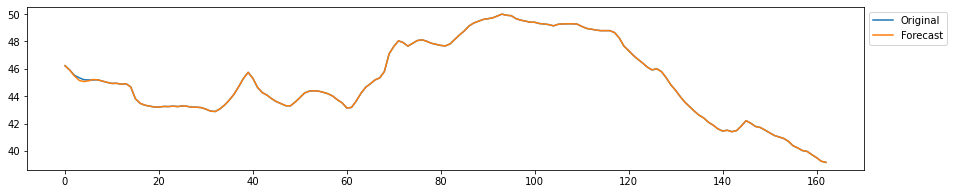

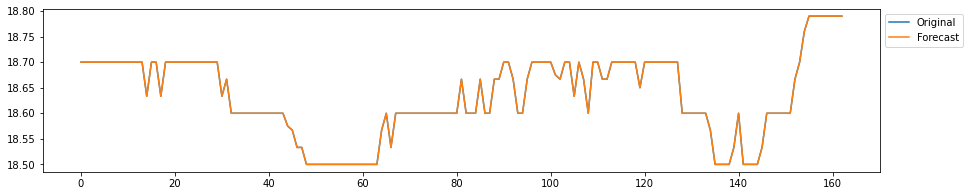

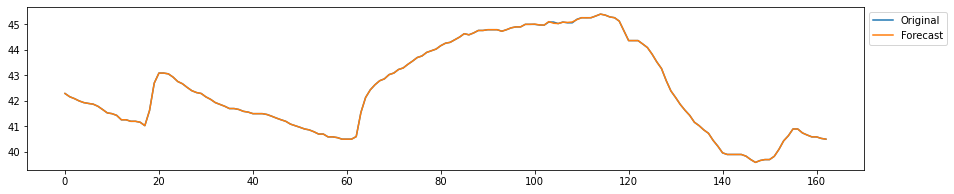

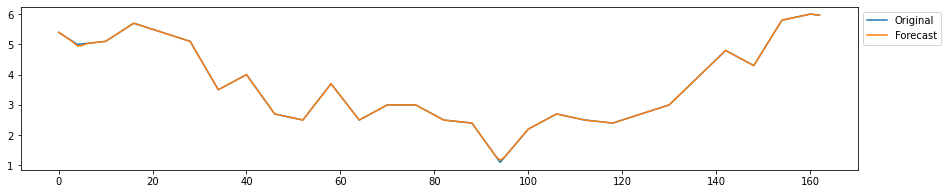

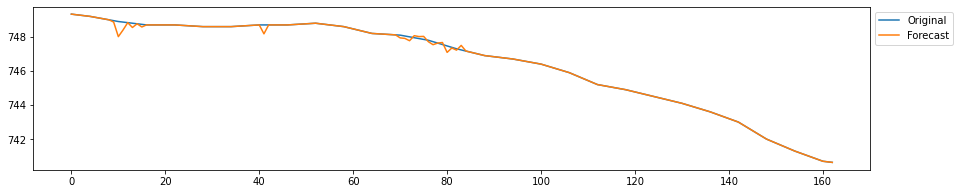

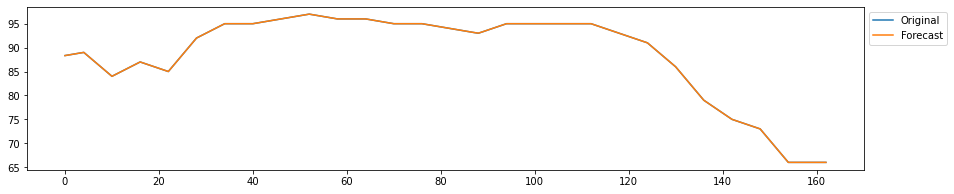

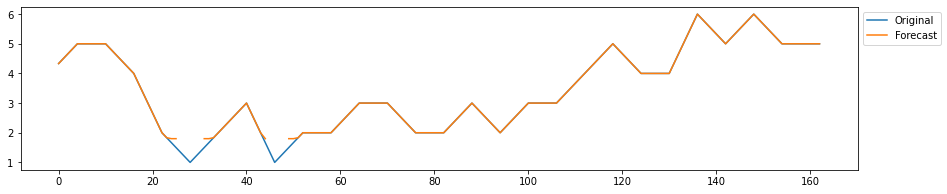

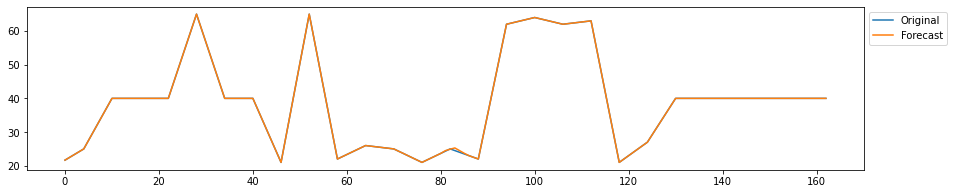

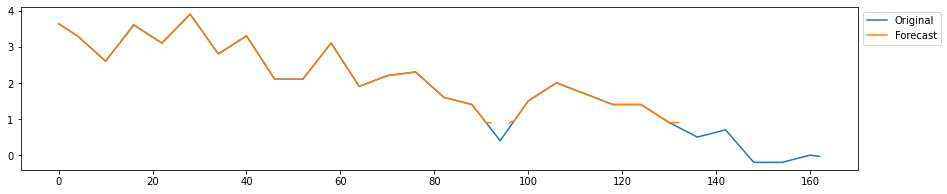

--------------------

 ===> Training window 4599

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)T1(t+1) model (learning)

RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)

RH_8(t+1) model (learning)T9(t+1) model (learning)

RH_9(t+1) model (learning)
T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)

RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 32.6 secs 
 32.6 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as targetlights(t+1) --> forecasting 
lights(t)

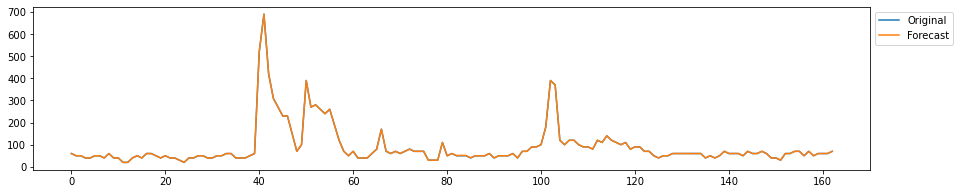

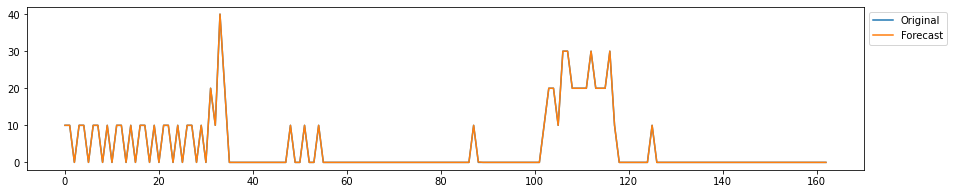

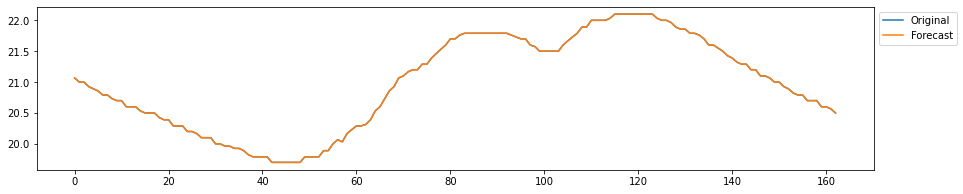

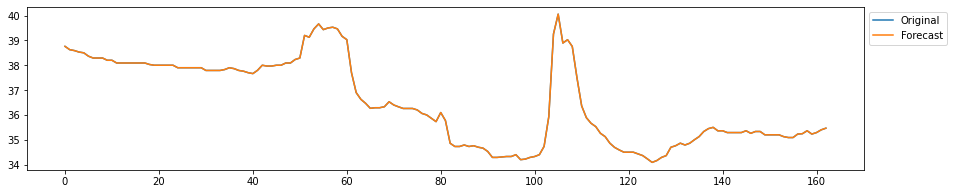

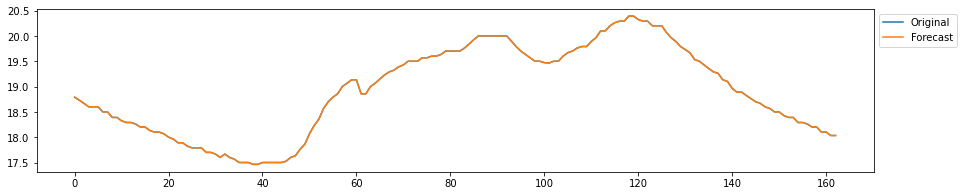

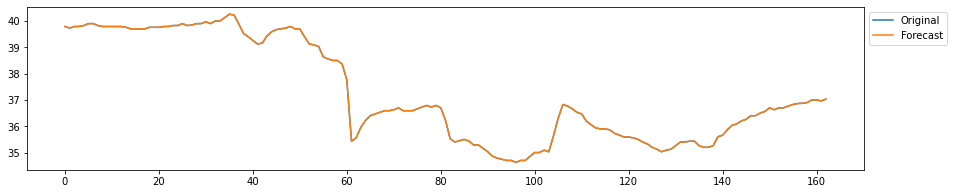

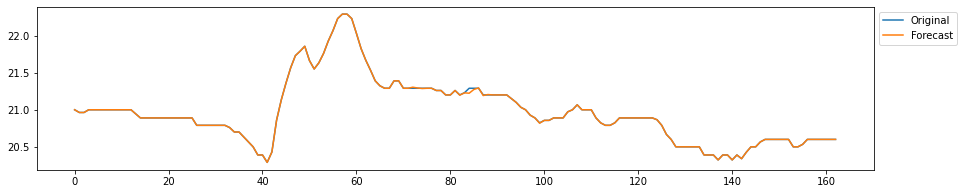

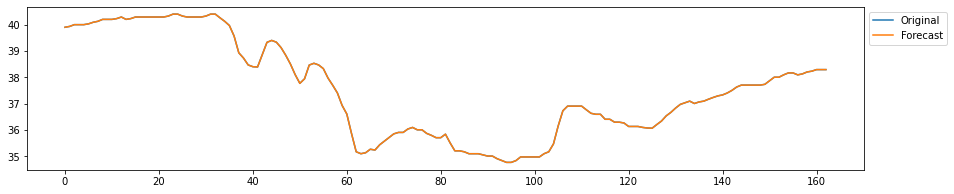

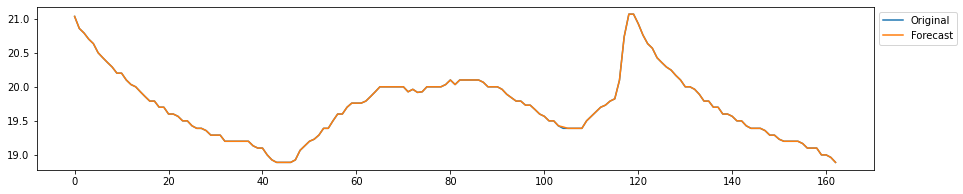

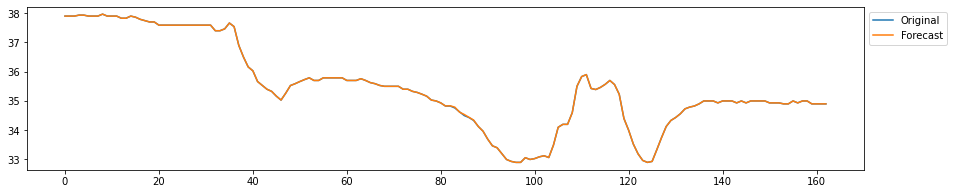

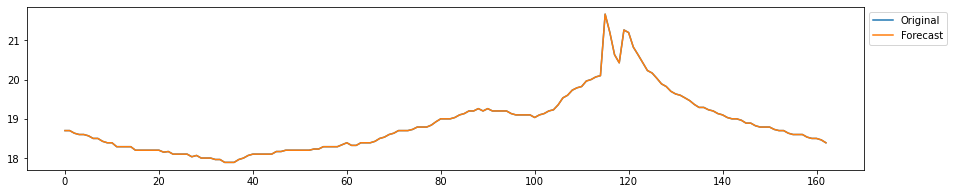

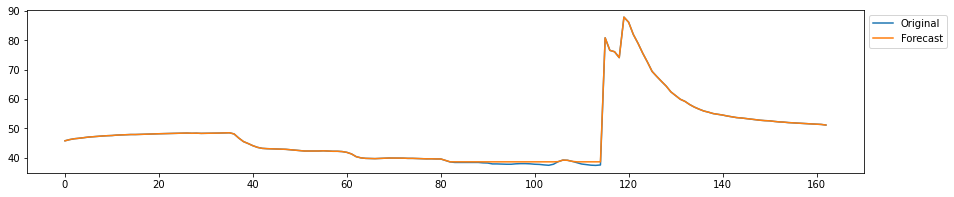

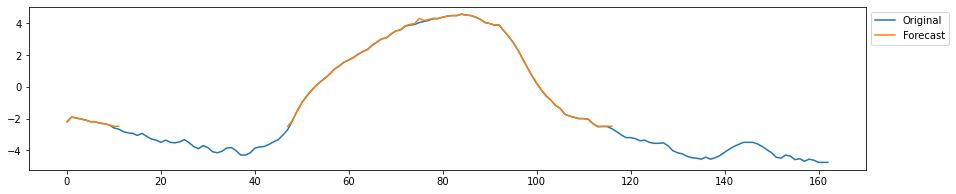

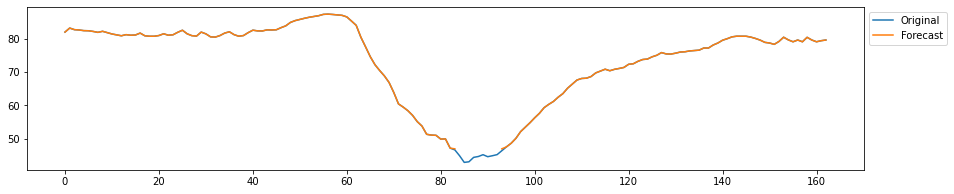

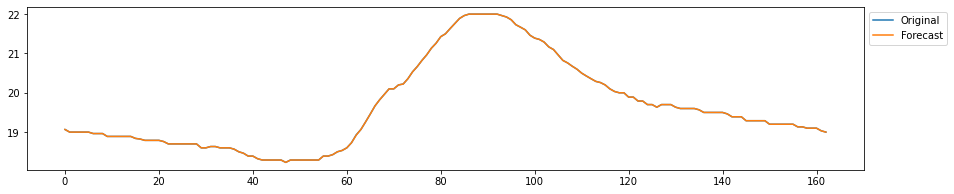

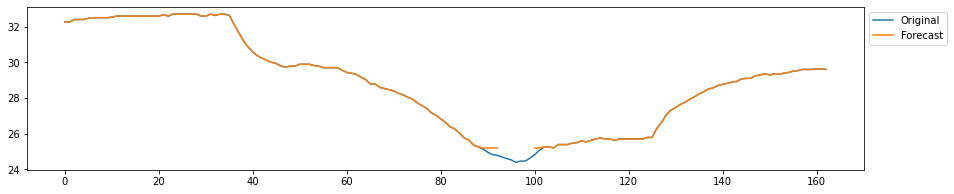

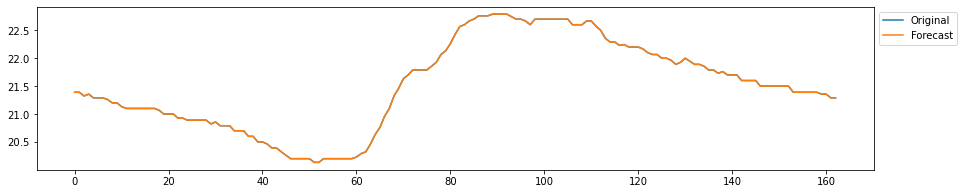

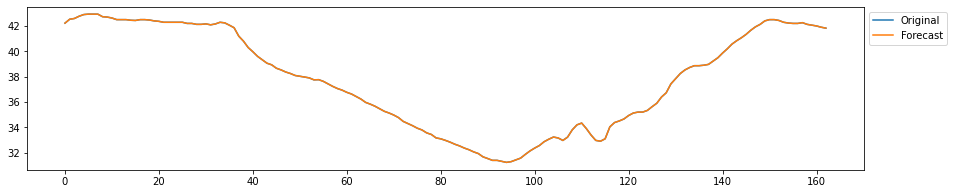

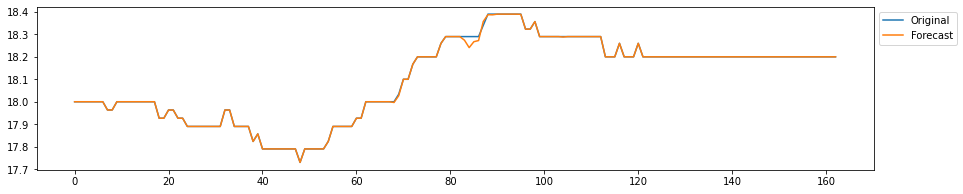

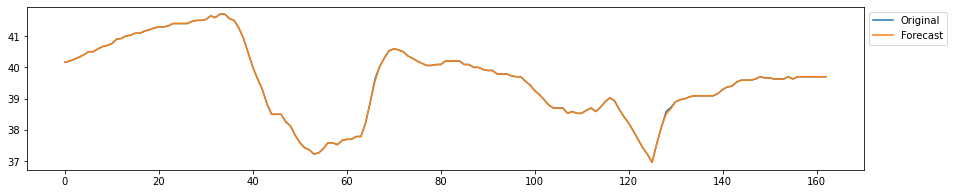

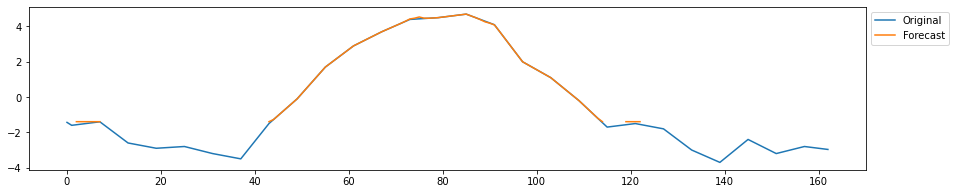

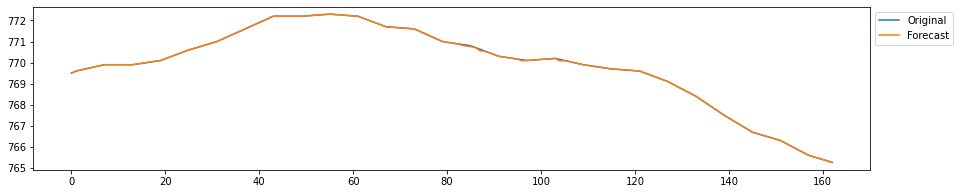

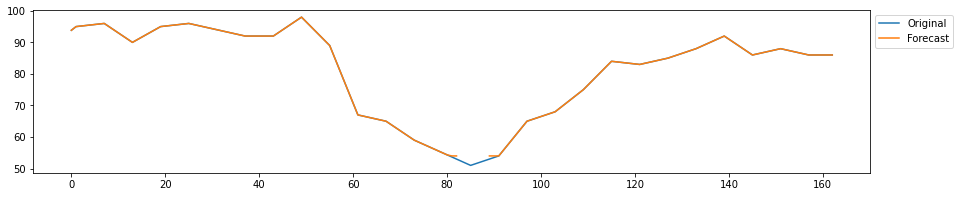

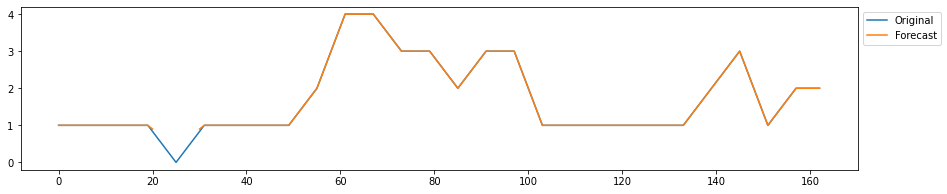

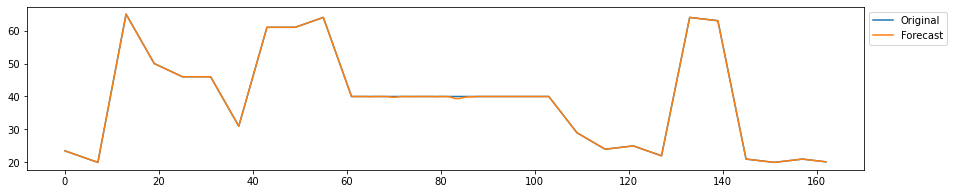

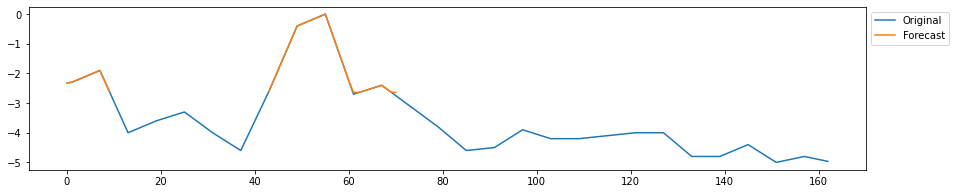

--------------------

 ===> Training window 5256

Start method learning.
 
Appliances(t+1) model (learning)lights(t+1) model (learning)T1(t+1) model (learning)


RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)RH_4(t+1) model (learning)
T5(t+1) model (learning)

RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)RH_9(t+1) model (learning)

T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)

RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 33.2 secs 
 33.2 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target
T1(t+1) --> f

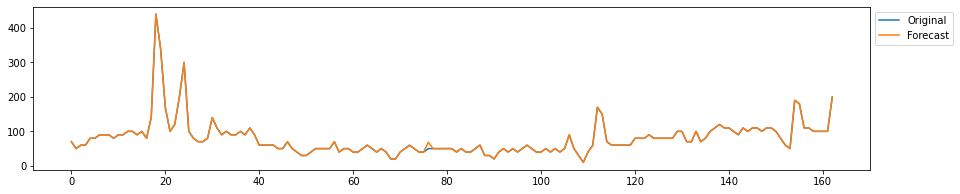

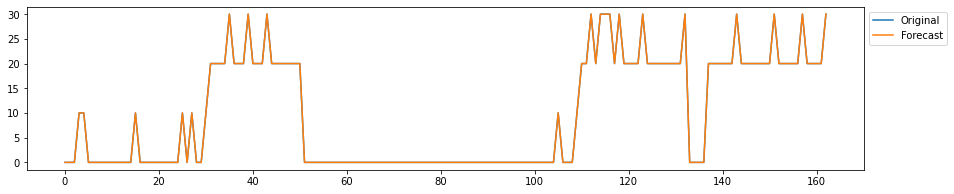

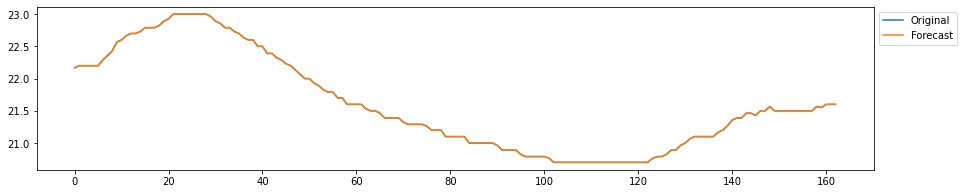

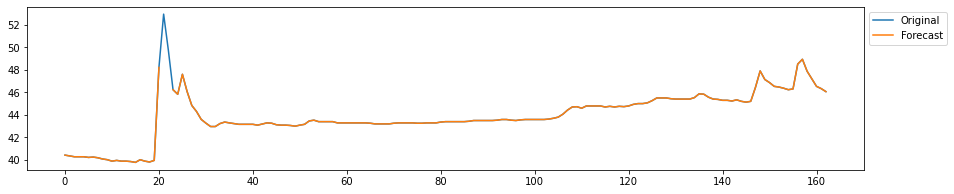

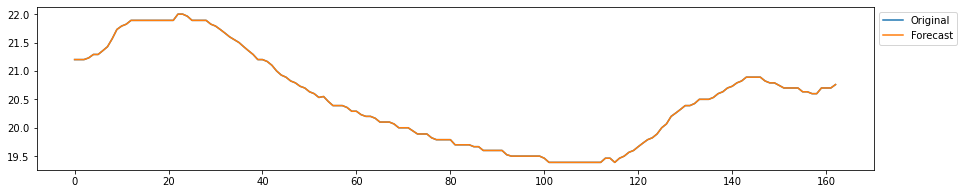

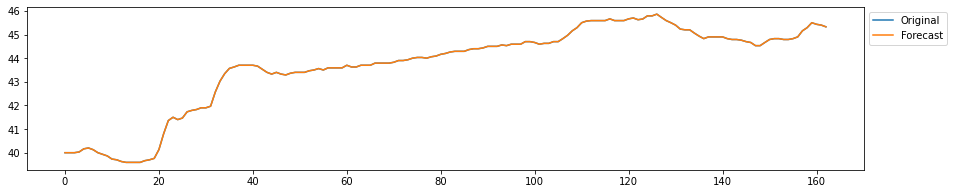

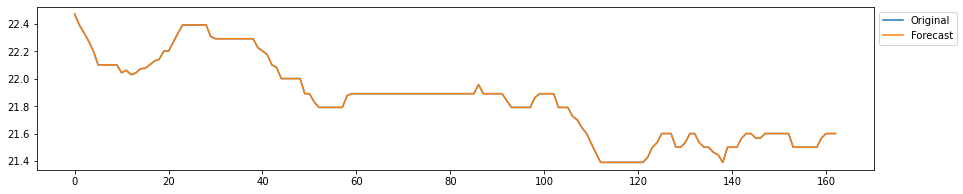

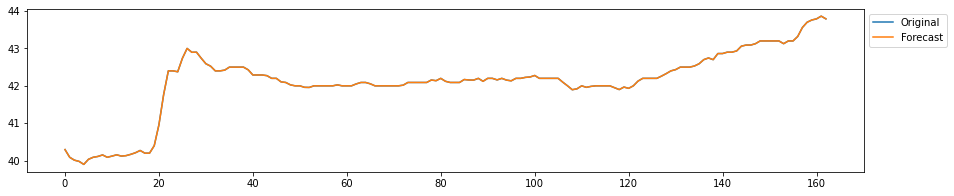

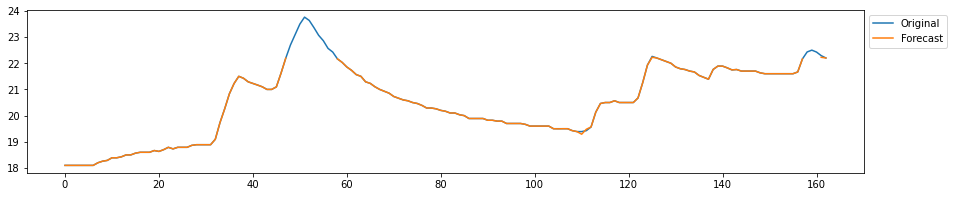

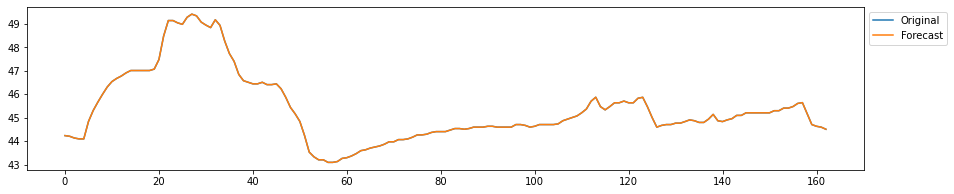

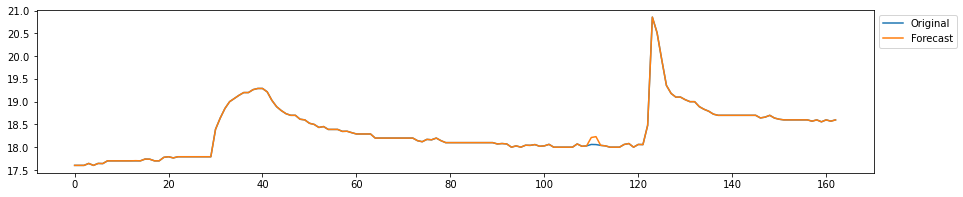

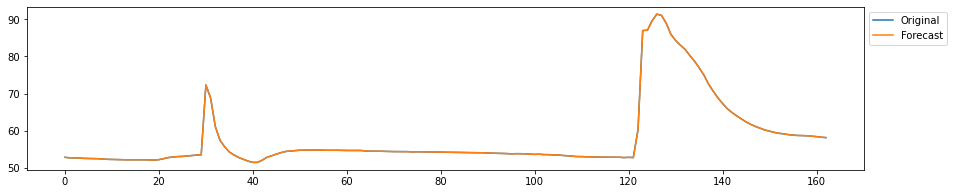

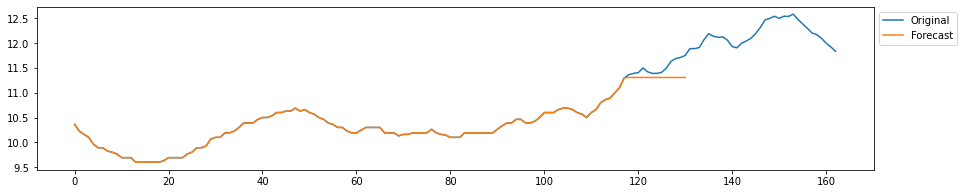

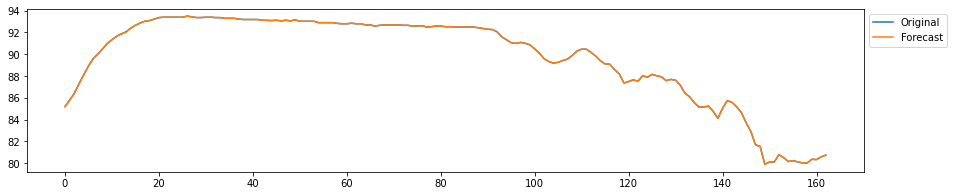

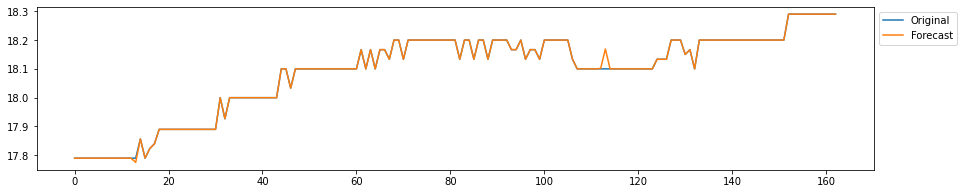

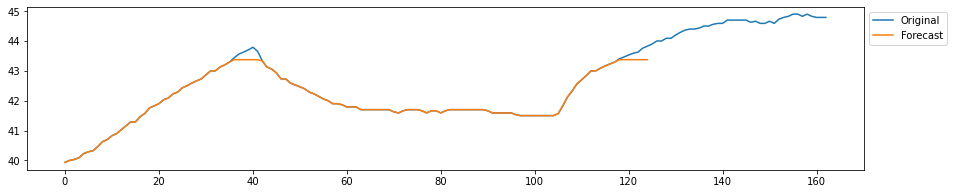

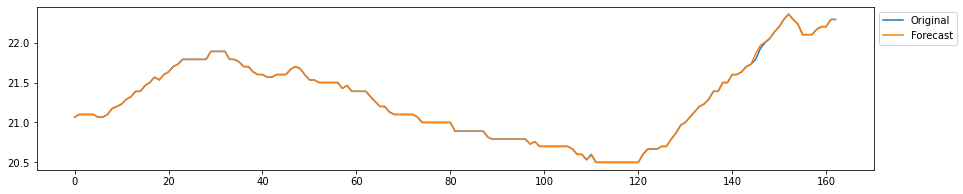

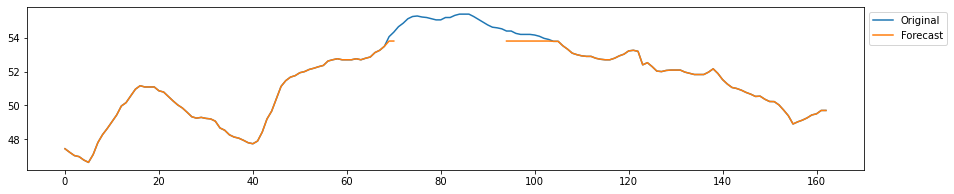

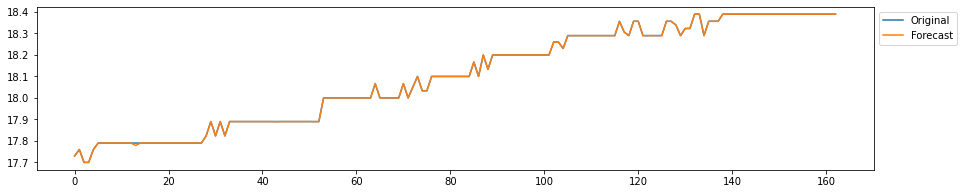

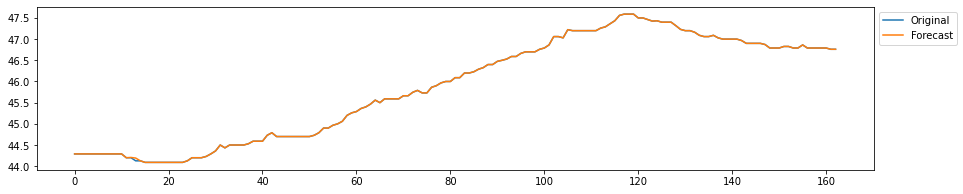

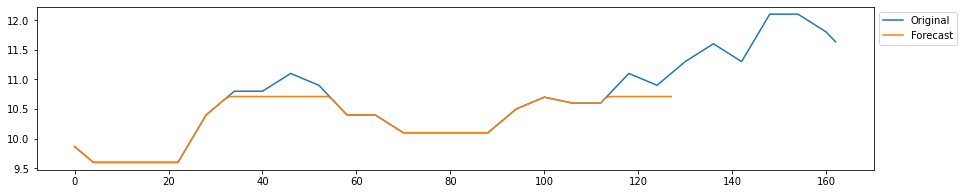

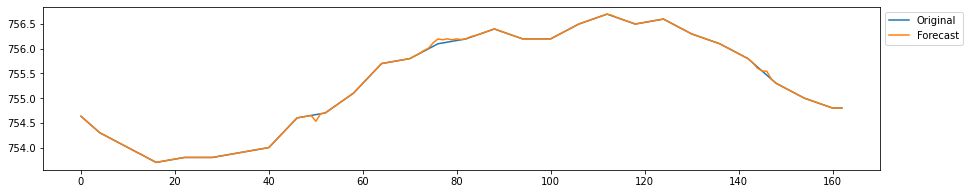

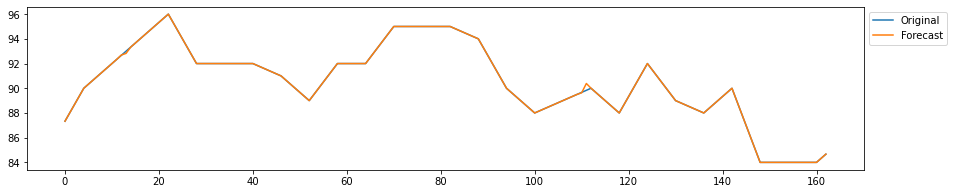

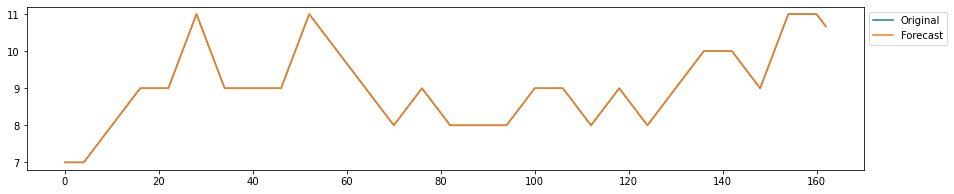

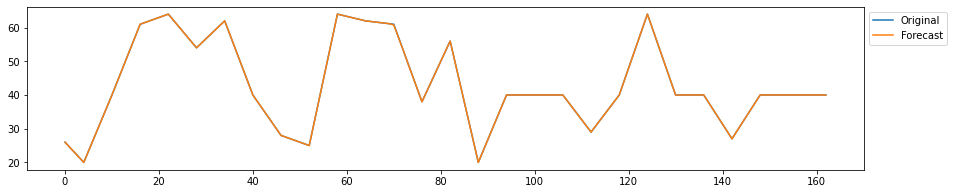

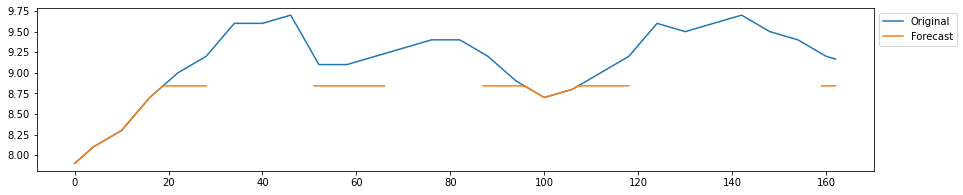

--------------------

 ===> Training window 5913

Start method learning.
 
Appliances(t+1) model (learning)lights(t+1) model (learning)
T1(t+1) model (learning)

RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)RH_6(t+1) model (learning)
T7(t+1) model (learning)

RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)

RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 35.0 secs 
 35.0 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> forecasting 
lights(t

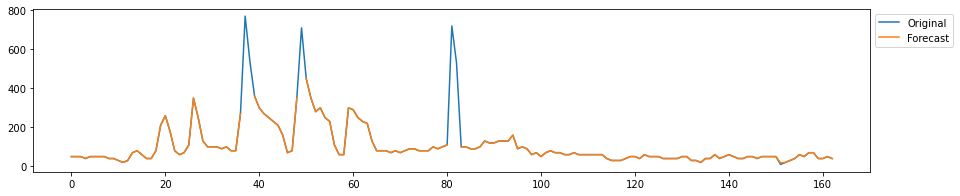

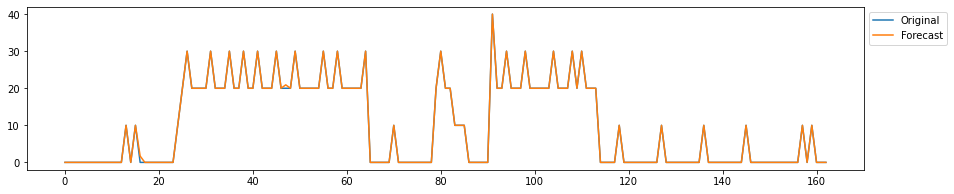

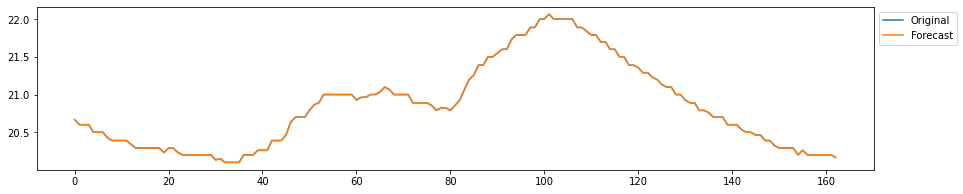

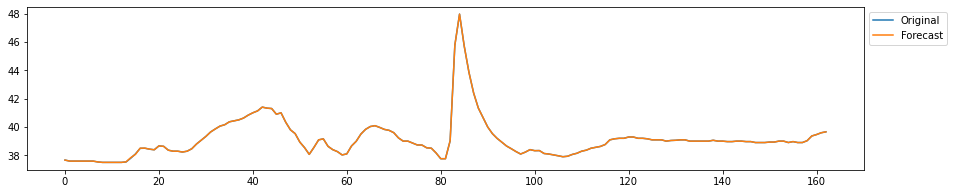

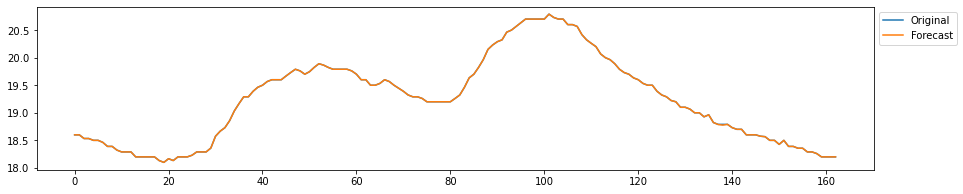

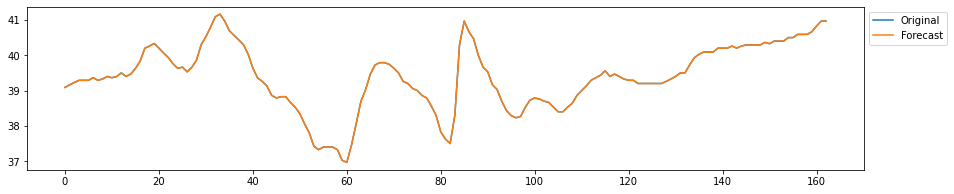

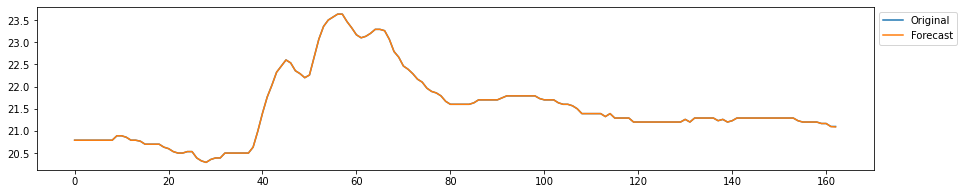

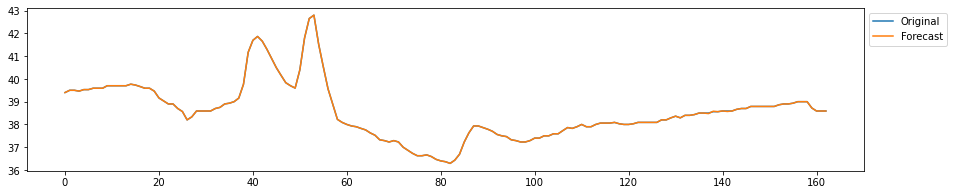

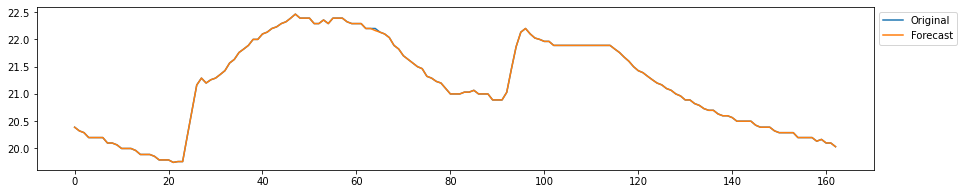

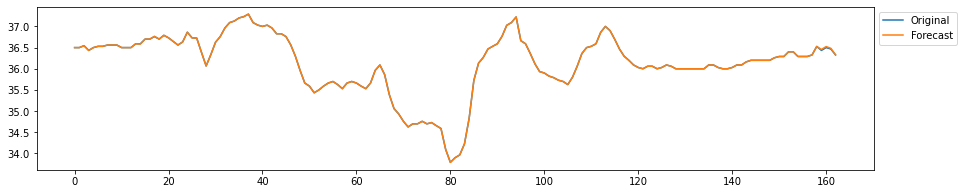

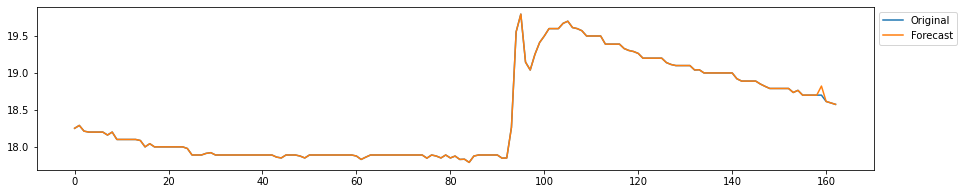

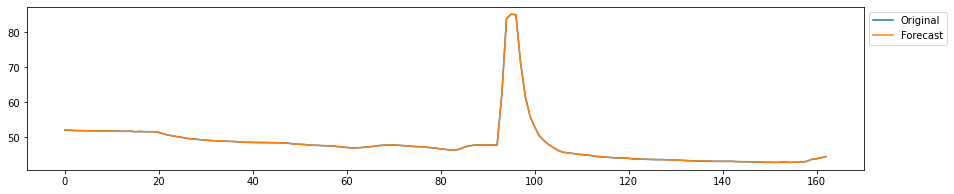

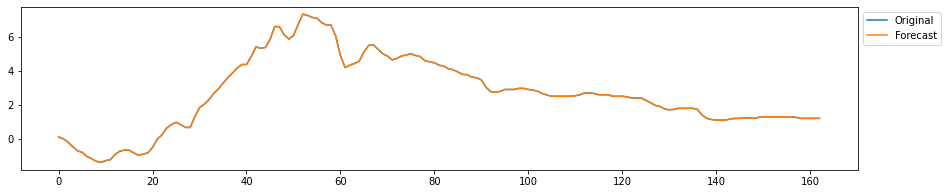

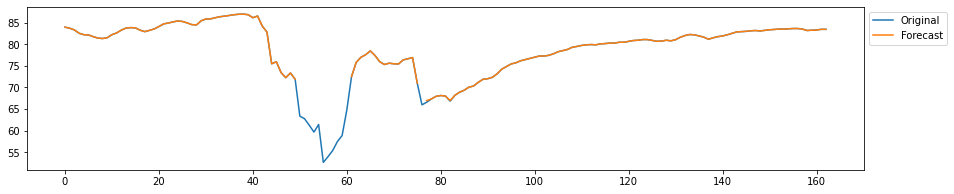

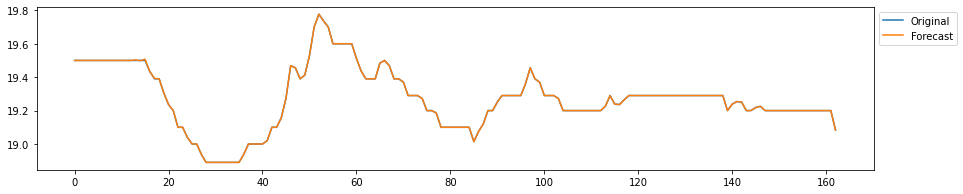

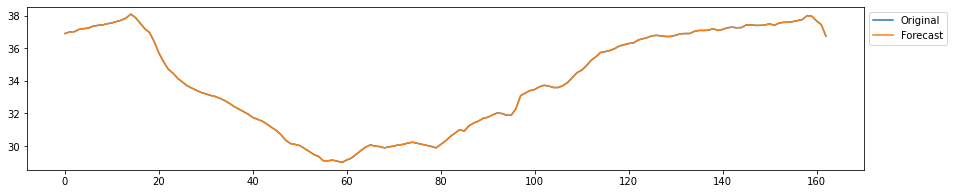

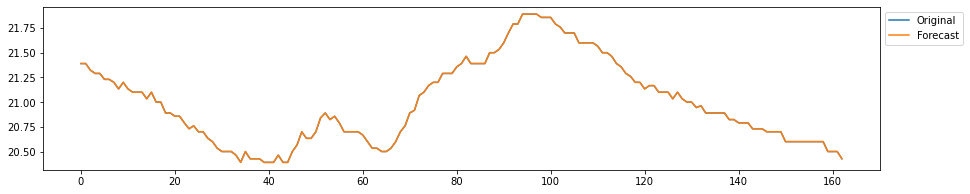

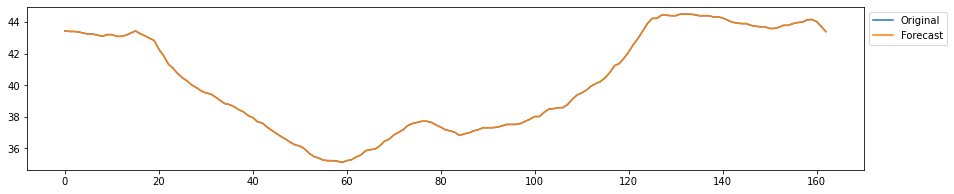

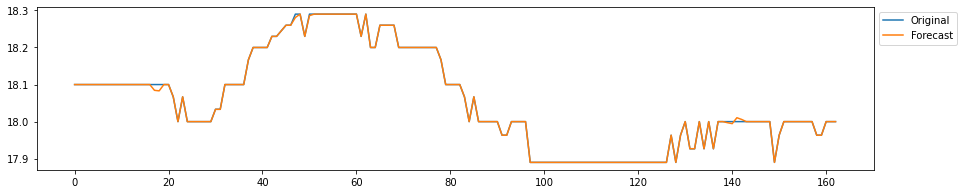

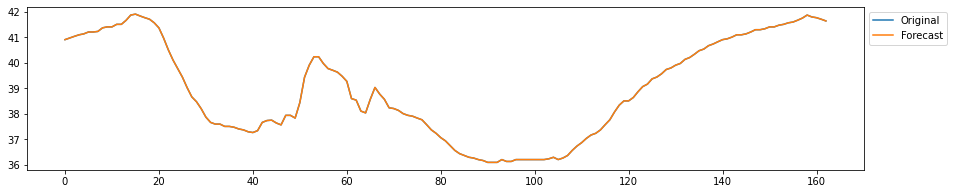

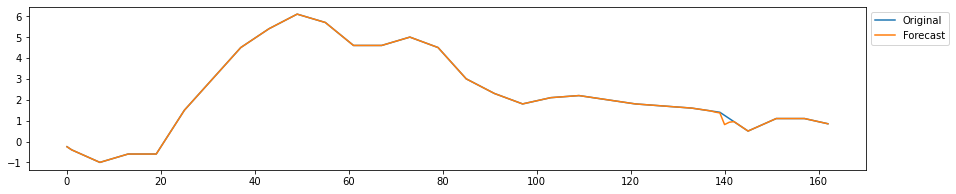

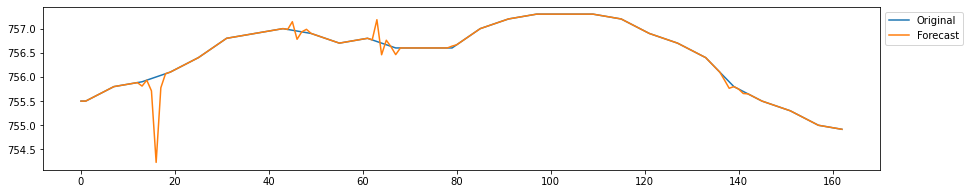

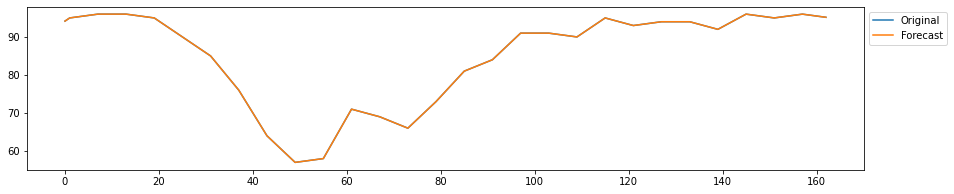

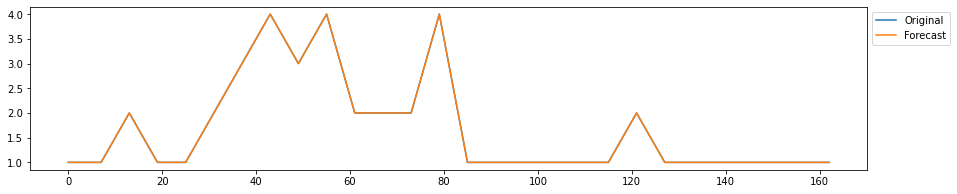

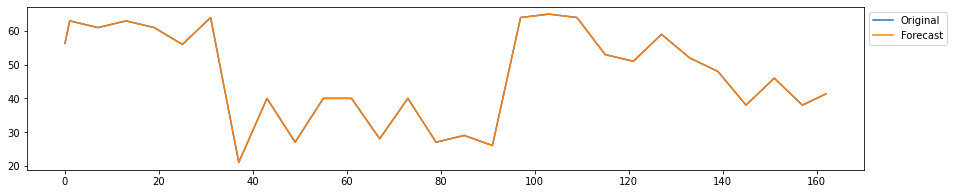

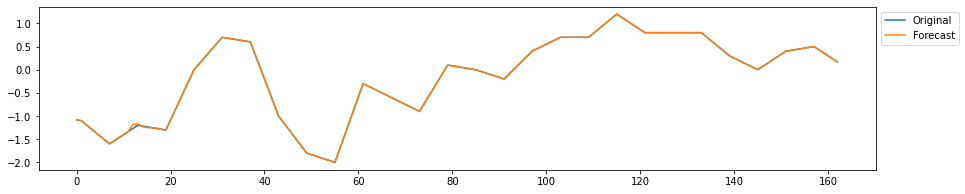

--------------------

 ===> Training window 6570

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)
T2(t+1) model (learning)RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)

T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)

 
End method learning.
 
 33.3 secs 
 33.3 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting 
Appliances(t)---> input this variable as target
lights(t+1) --> forecasting 
lights(t

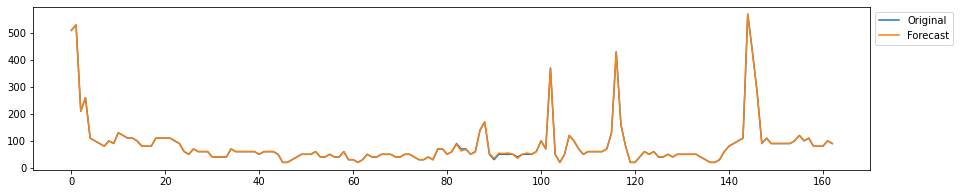

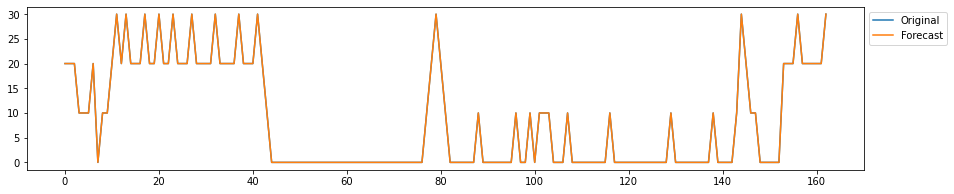

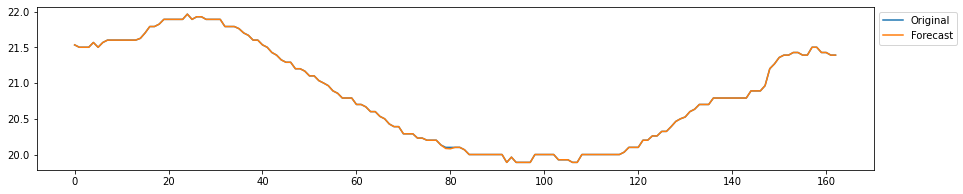

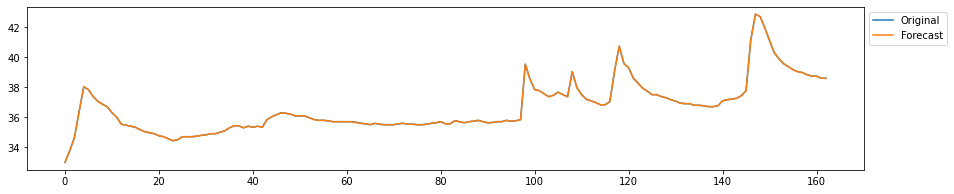

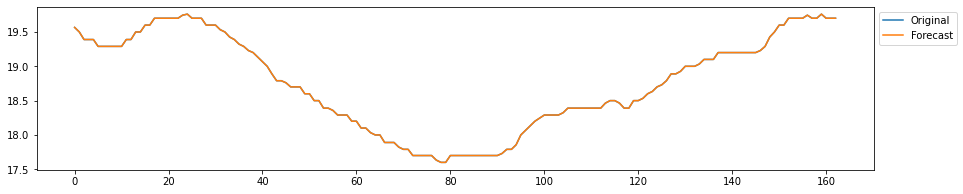

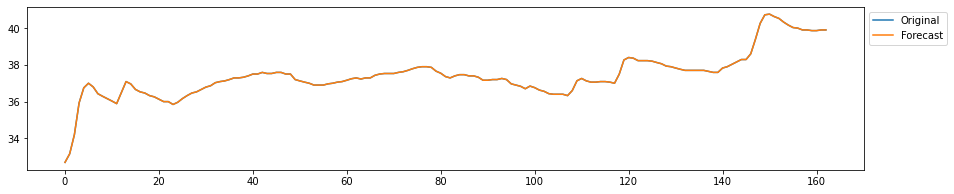

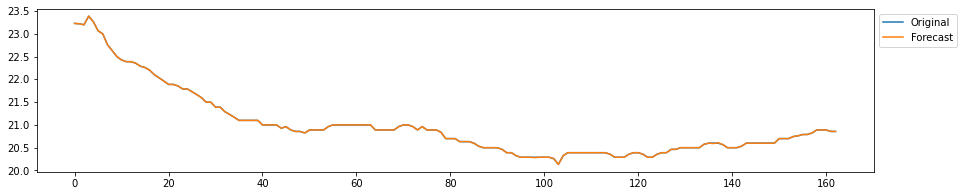

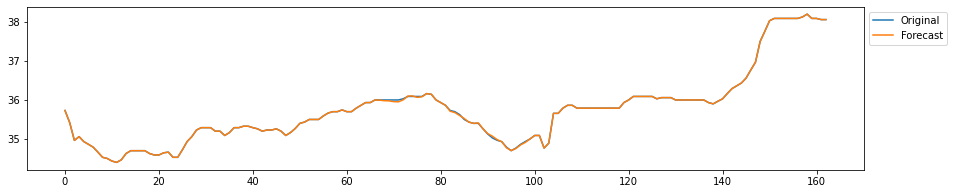

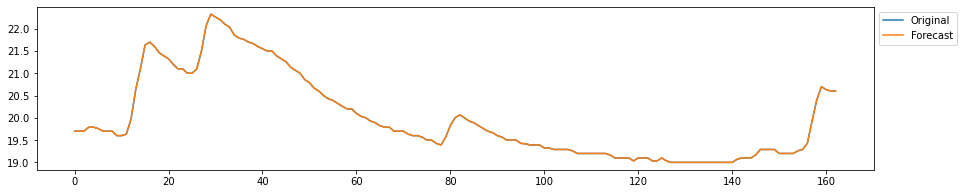

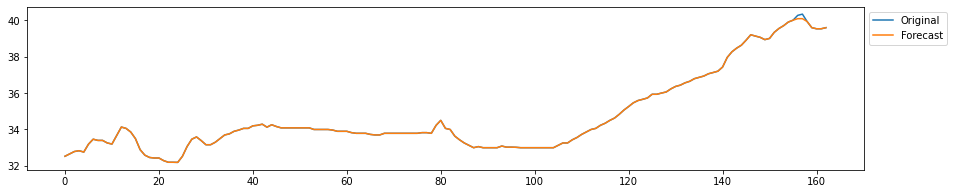

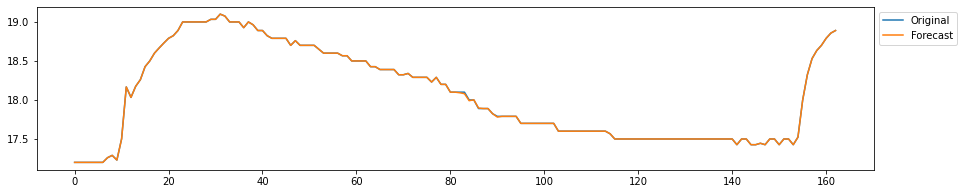

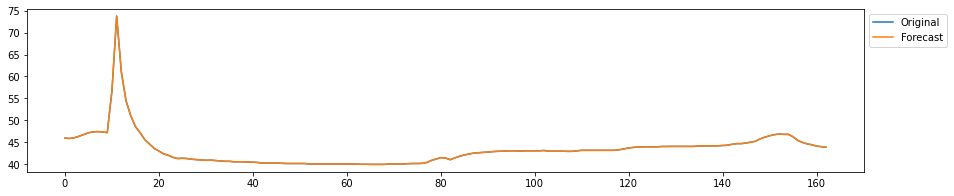

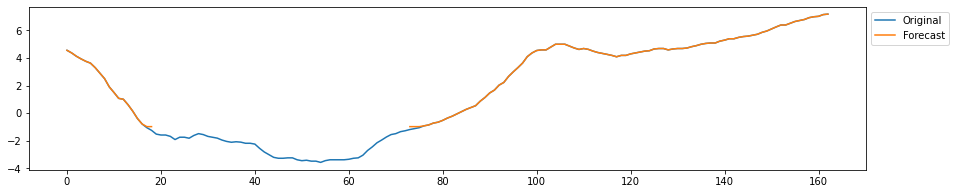

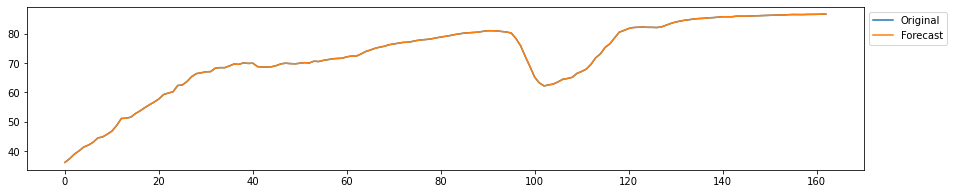

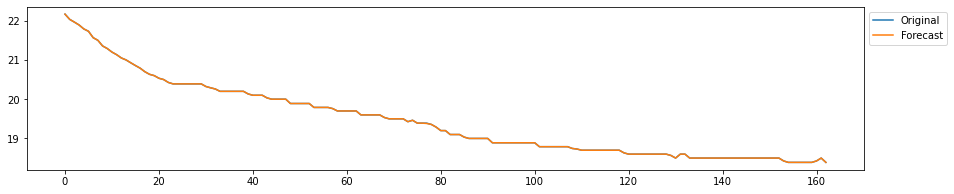

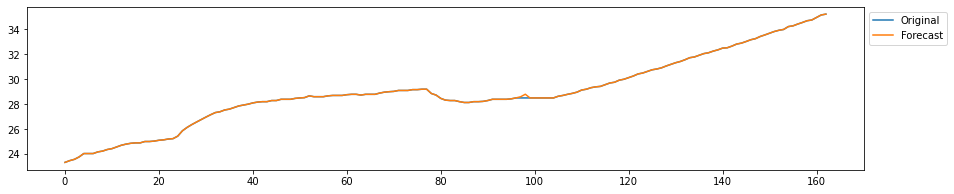

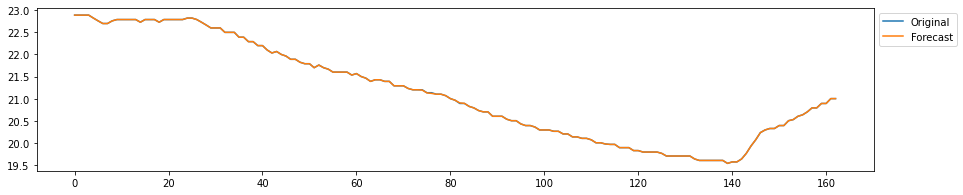

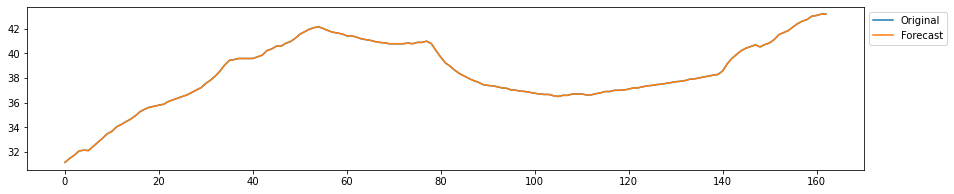

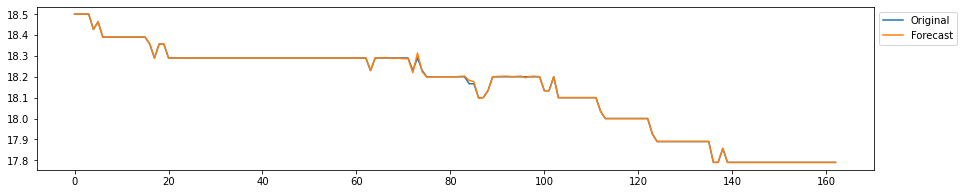

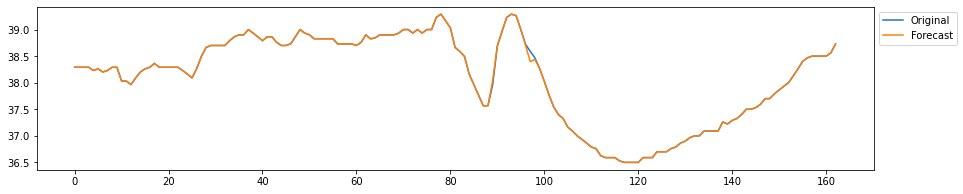

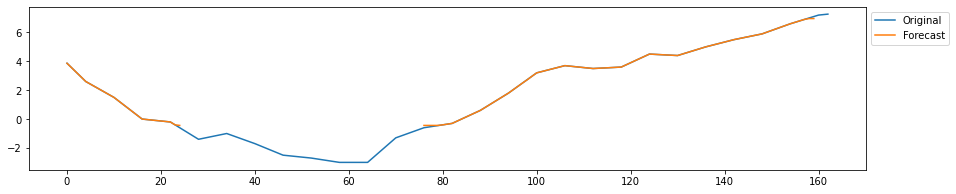

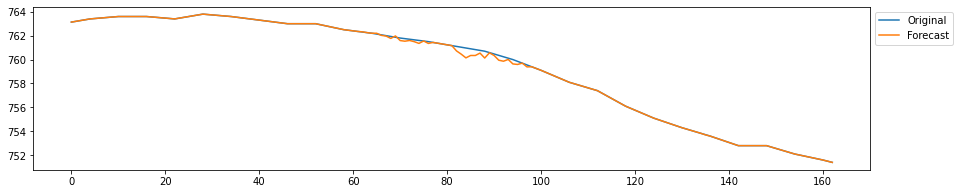

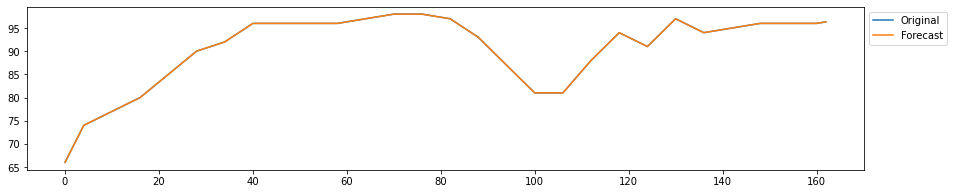

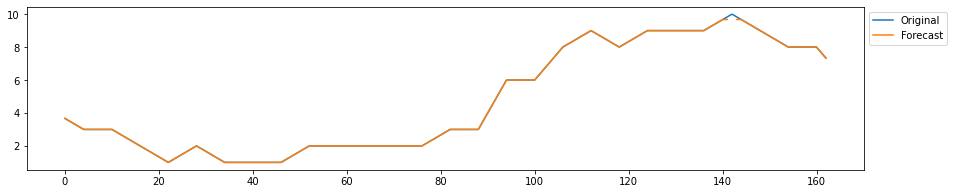

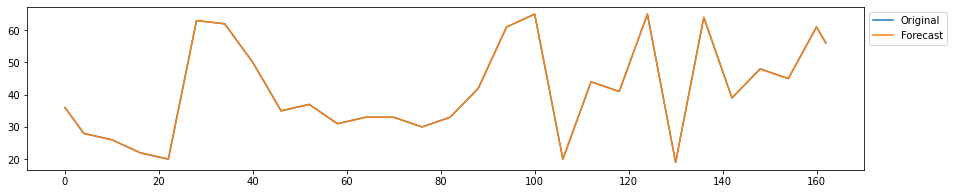

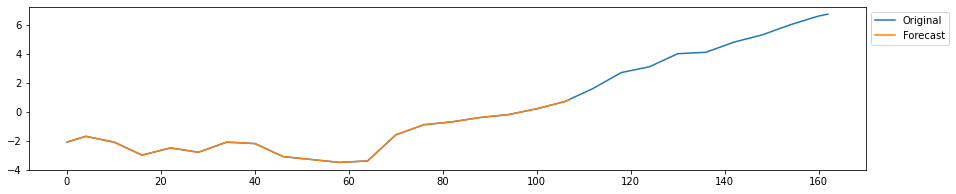

--------------------

 ===> Training window 7227

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)RH_1(t+1) model (learning)
T2(t+1) model (learning)

RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)
RH_8(t+1) model (learning)
T9(t+1) model (learning)
RH_9(t+1) model (learning)
T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)

Tdewpoint(t+1) model (learning)
 
End method learning.
 
 33.5 secs 
 33.5 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target
T1(t+1) --> f

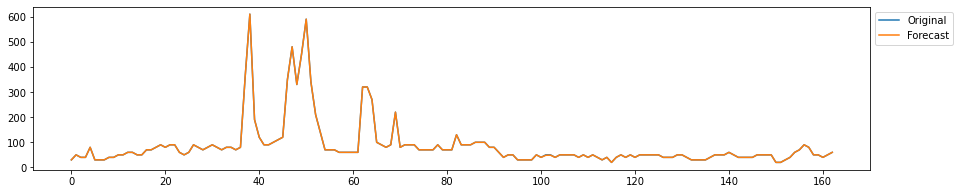

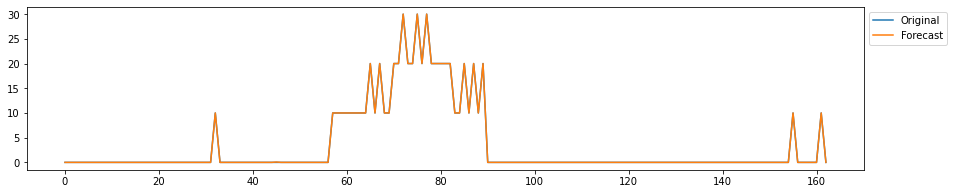

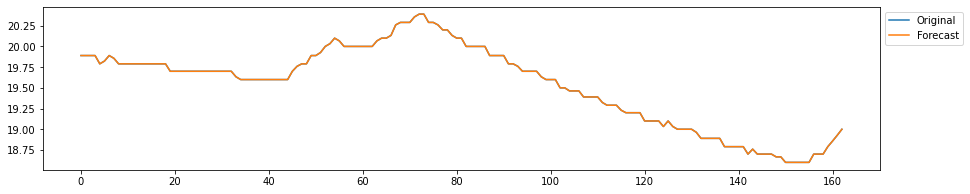

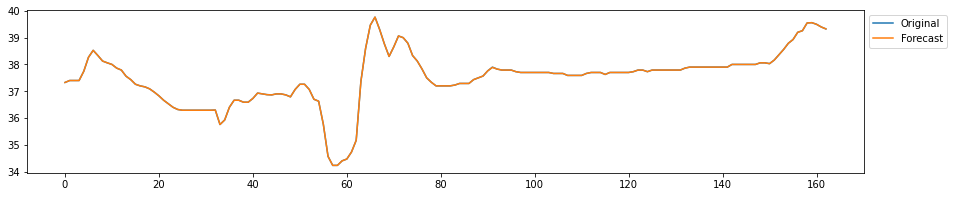

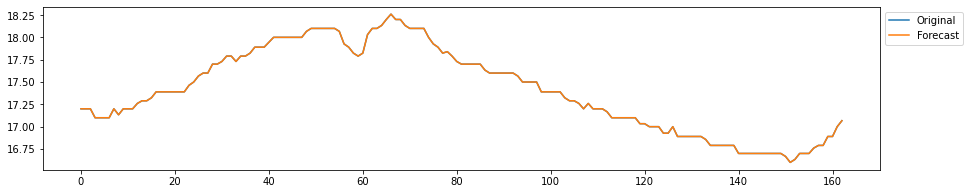

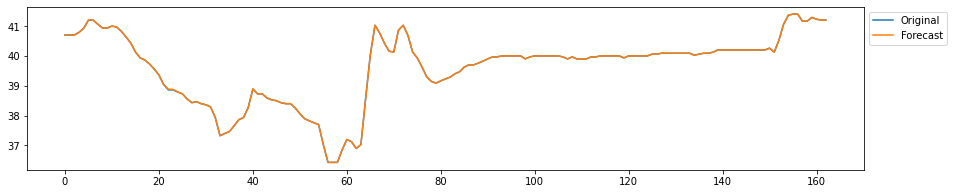

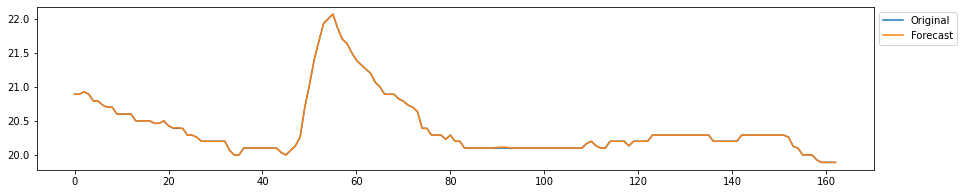

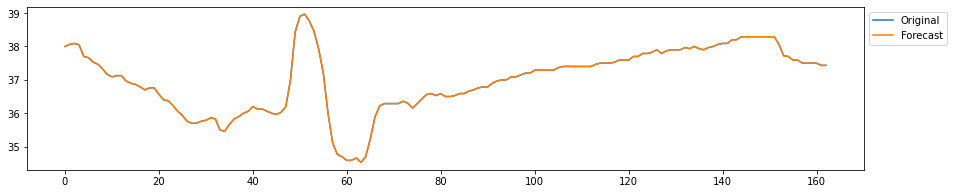

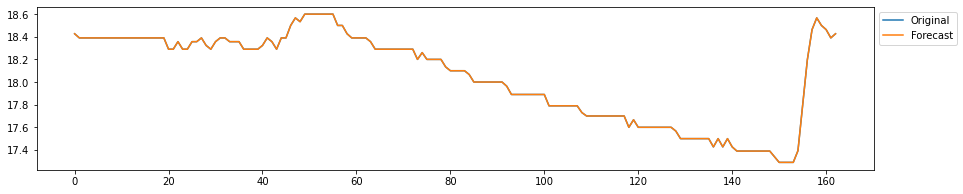

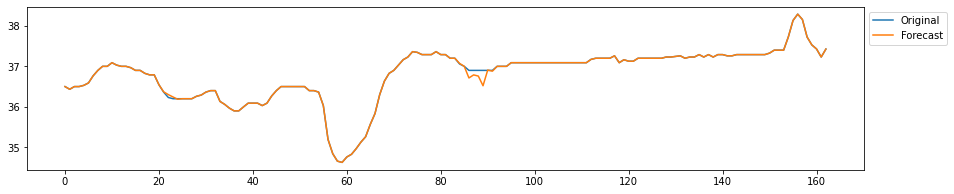

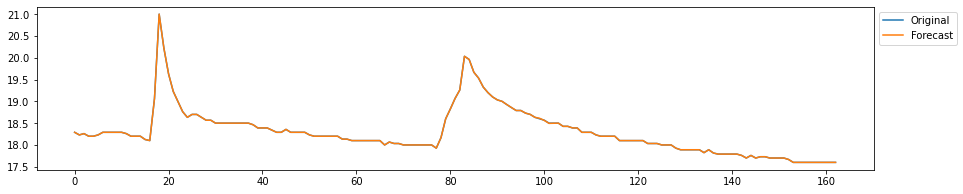

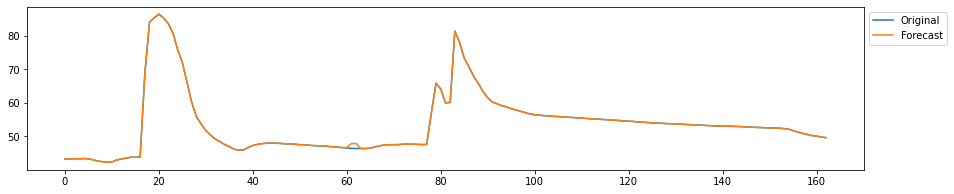

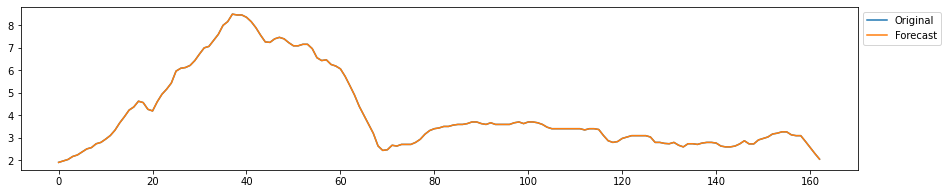

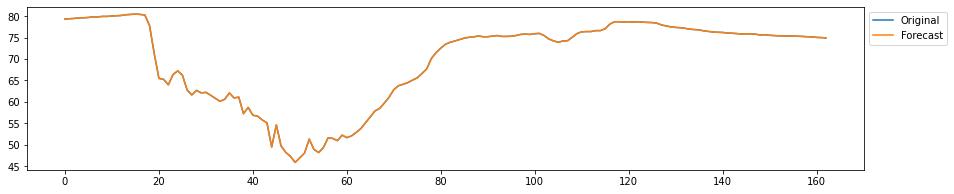

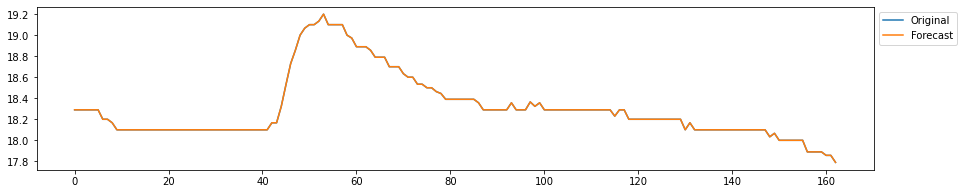

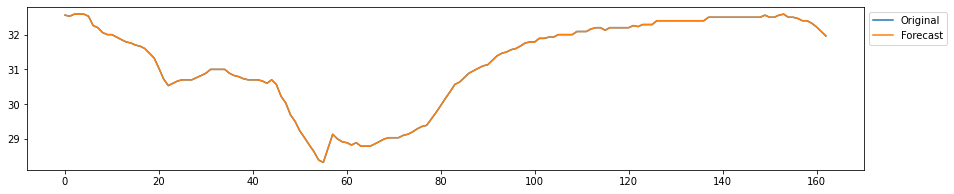

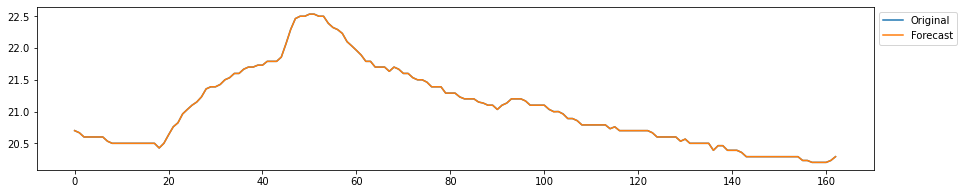

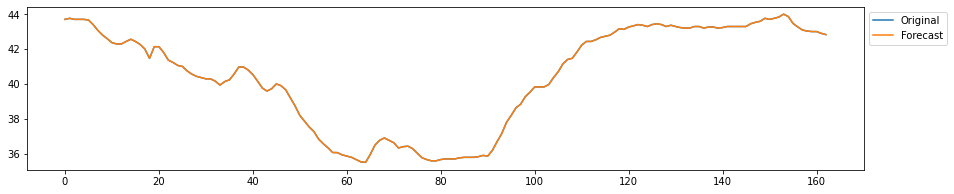

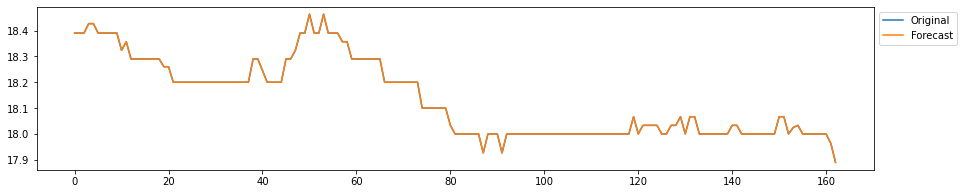

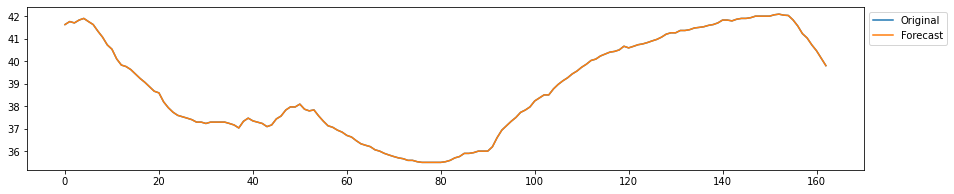

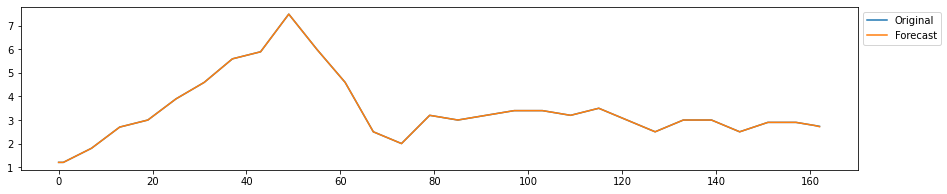

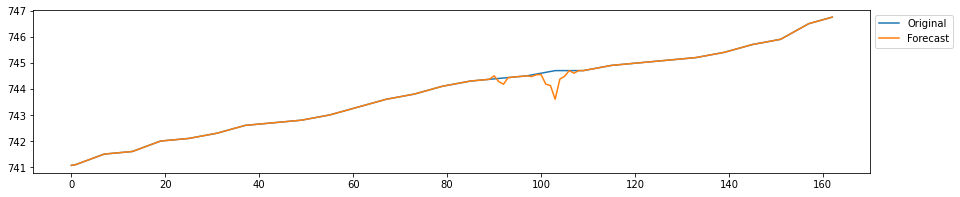

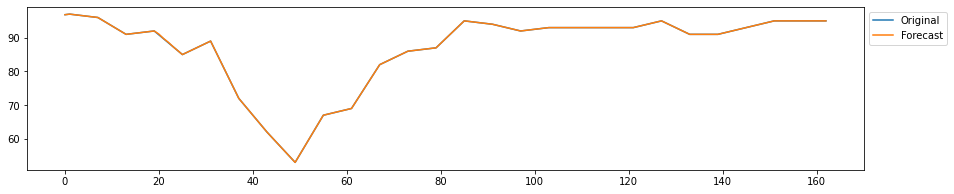

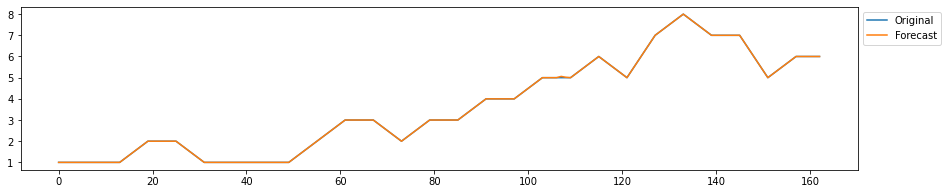

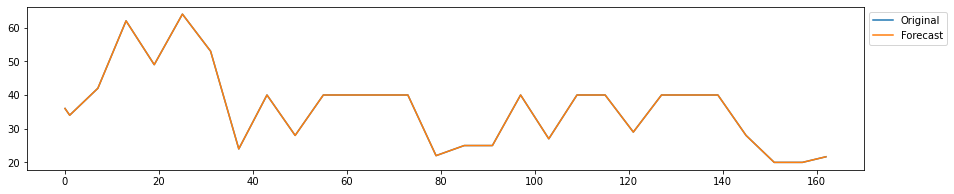

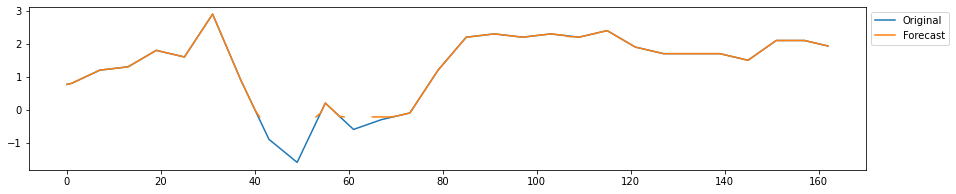

--------------------

 ===> Training window 7884

Start method learning.
 
Appliances(t+1) model (learning)lights(t+1) model (learning)T1(t+1) model (learning)


RH_1(t+1) model (learning)
T2(t+1) model (learning)
RH_2(t+1) model (learning)
T3(t+1) model (learning)
RH_3(t+1) model (learning)
T4(t+1) model (learning)
RH_4(t+1) model (learning)T5(t+1) model (learning)
RH_5(t+1) model (learning)

T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)T8(t+1) model (learning)RH_8(t+1) model (learning)

T9(t+1) model (learning)
RH_9(t+1) model (learning)

T_out(t+1) model (learning)
Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)
Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)
 
End method learning.
 
 34.3 secs 
 34.3 secs   0.4 MByte
 
Start method forecasting.

Appliances(t+1) --> forecasting lights(t+1) --> forecasting 
lights(t)---> input this variable as target
T1(t+1) --> f

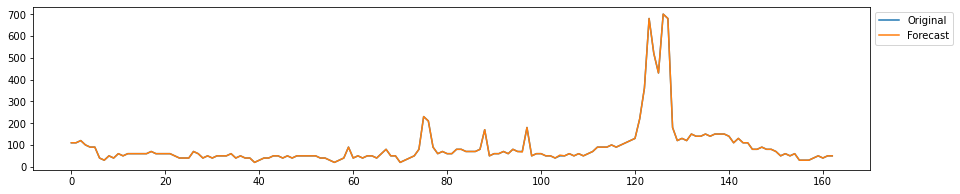

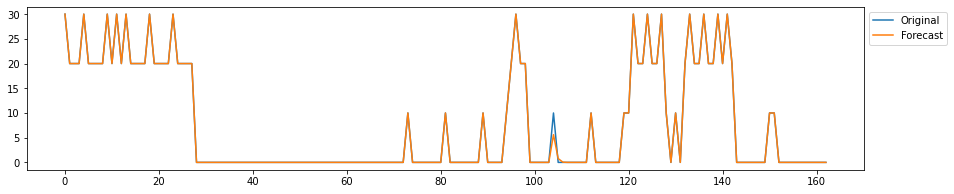

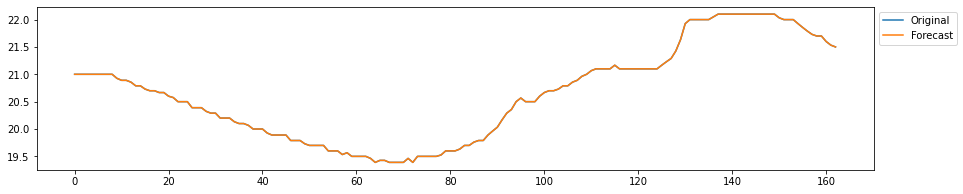

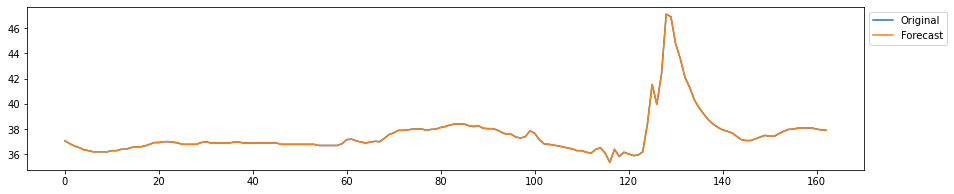

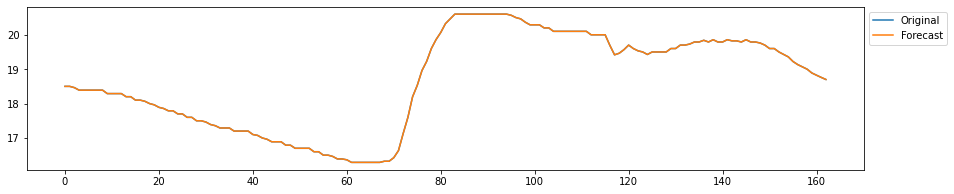

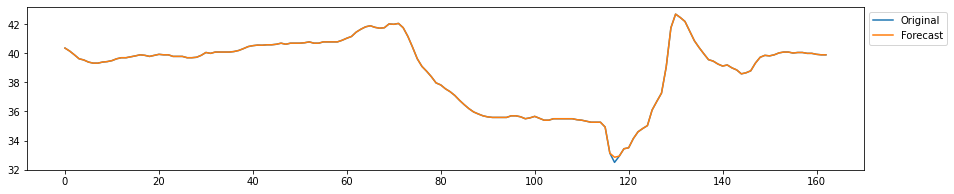

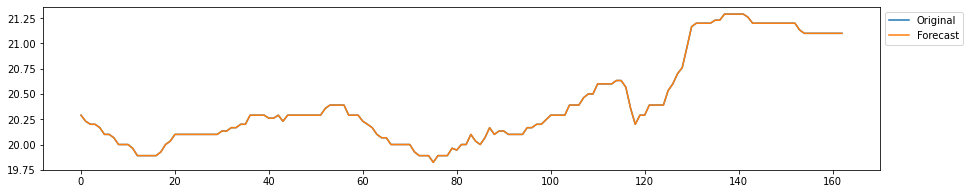

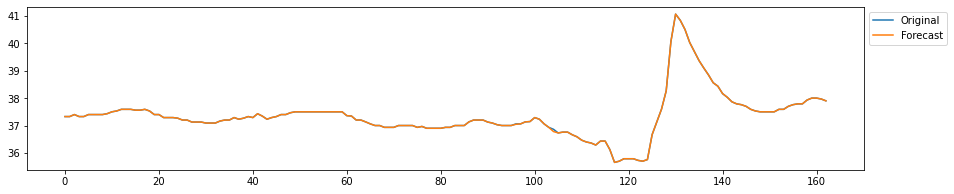

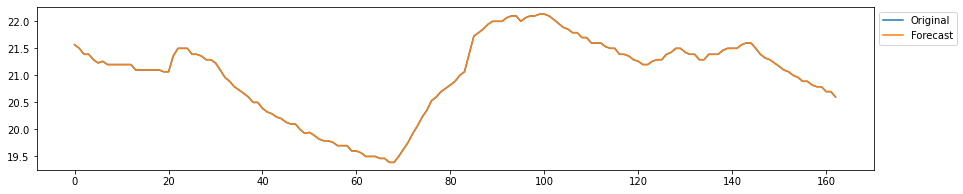

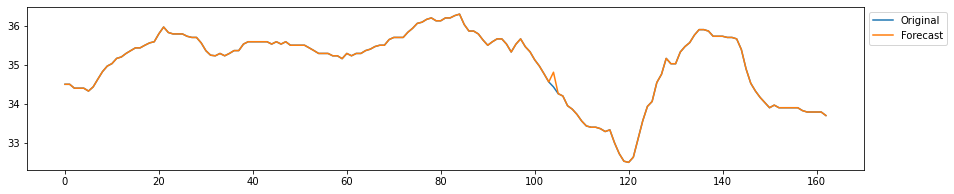

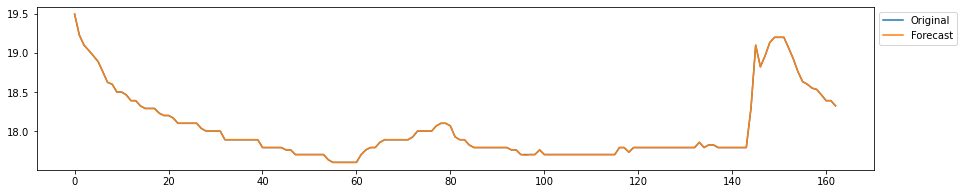

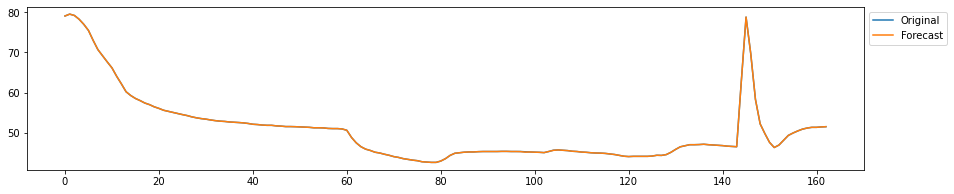

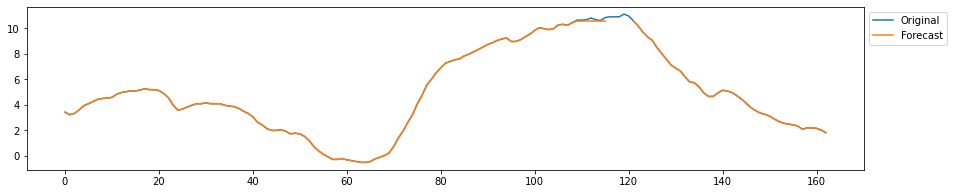

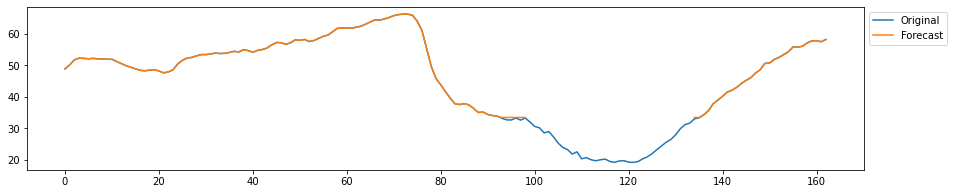

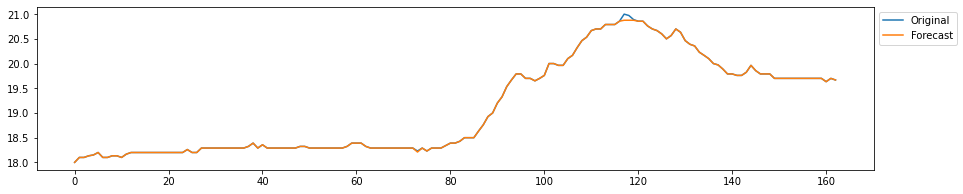

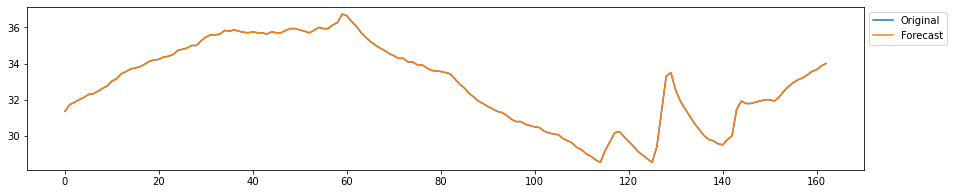

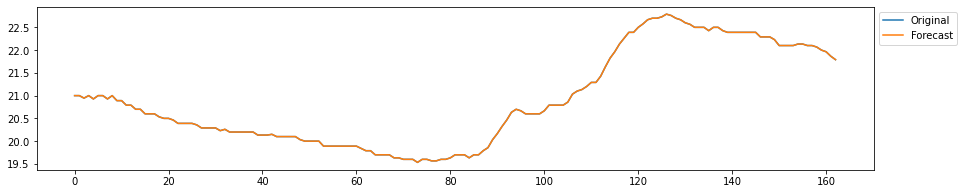

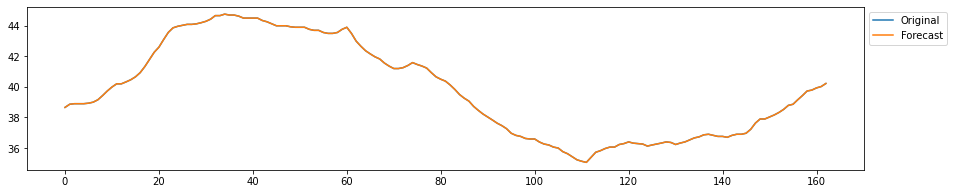

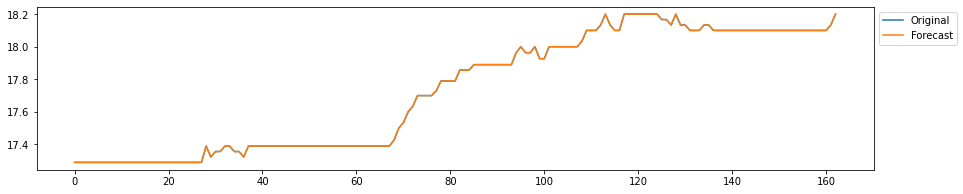

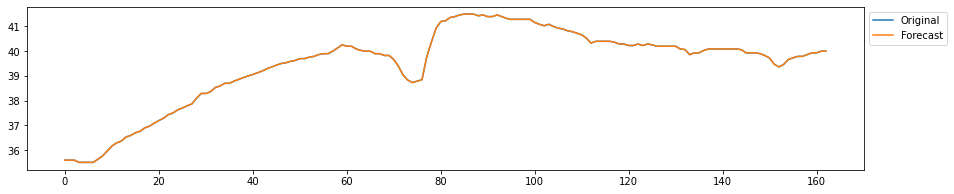

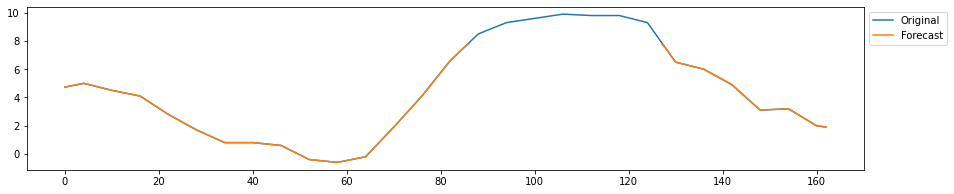

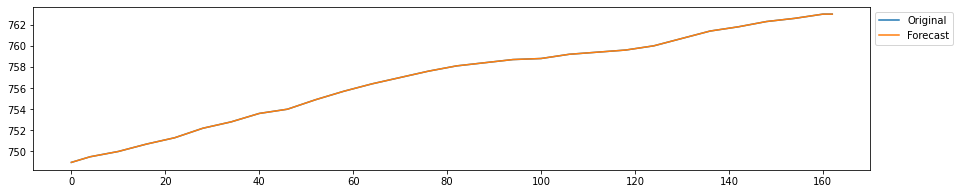

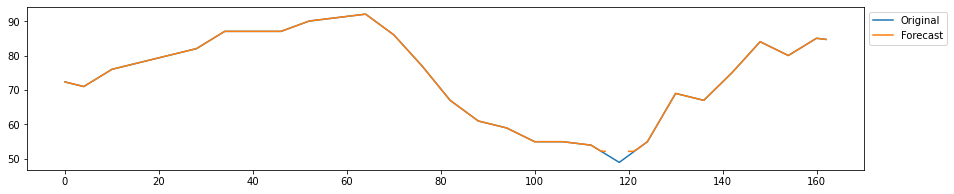

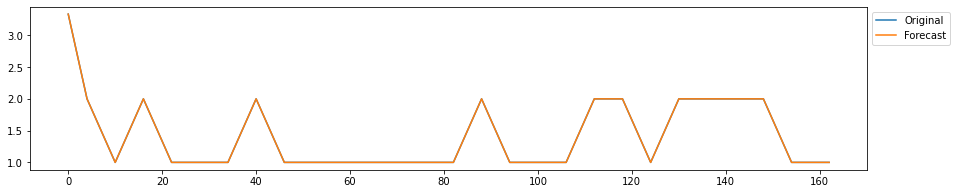

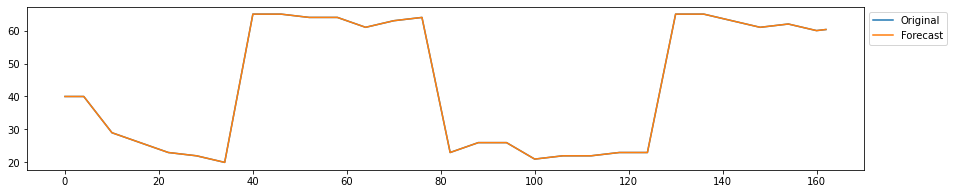

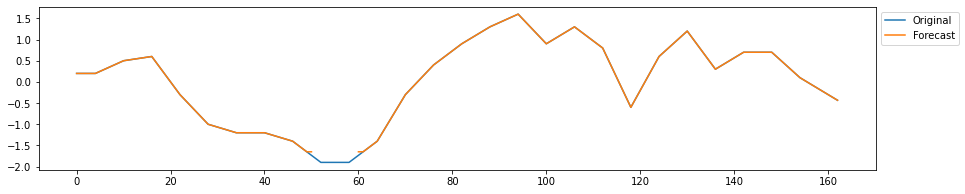

--------------------

 ===> Training window 8541

Start method learning.
 
Appliances(t+1) model (learning)
lights(t+1) model (learning)
T1(t+1) model (learning)
RH_1(t+1) model (learning)T2(t+1) model (learning)
RH_2(t+1) model (learning)T3(t+1) model (learning)
RH_3(t+1) model (learning)


T4(t+1) model (learning)
RH_4(t+1) model (learning)
T5(t+1) model (learning)
RH_5(t+1) model (learning)
T6(t+1) model (learning)
RH_6(t+1) model (learning)
T7(t+1) model (learning)
RH_7(t+1) model (learning)
T8(t+1) model (learning)RH_8(t+1) model (learning)
T9(t+1) model (learning)

RH_9(t+1) model (learning)
T_out(t+1) model (learning)Press_mm_hg(t+1) model (learning)
RH_out(t+1) model (learning)

Windspeed(t+1) model (learning)
Visibility(t+1) model (learning)
Tdewpoint(t+1) model (learning)


In [ ]:
final_metrics_measures_pca, metrics_measures_pca = statistics_util.sliding_windows_mimo_2(data = data, n_windows = n_windows, train_size= train_size, 
                                                        efts_model = efts_multi_step, transformation = transformation, 
                                                        first_col_test = first_col_test, last_col_test = last_col_test,
                                                        first_col_test_val = first_col_test_val, last_col_test_val = last_col_test_val,
                                                        time_steps = time_steps, target_variable = target_variable, 
                                                        plot_graph = plot_graph, vars_vector = vars_vector)

In [ ]:
pd.set_option('display.max_rows', None)
metrics_measures_pca.head(20)

In [ ]:
final_metrics_measures_pca

In [ ]:
metrics_measures_pca.to_csv (r'aec_metrics_measures_pca_parallel.csv', index = False, header=True)
final_metrics_measures_pca.to_csv (r'aec_final_metrics_measures_pca_parallel.csv', index = False, header=True)

### Embedding Transformation = KPCA

In [ ]:
transformation = 'KPCA' 

In [ ]:
final_metrics_measures_kpca, metrics_measures_kpca = statistics_util.sliding_windows_mimo_2(data = data, n_windows = n_windows, train_size= train_size, 
                                                        efts_model = efts_multi_step, transformation = transformation, 
                                                        first_col_test = first_col_test, last_col_test = last_col_test,
                                                        first_col_test_val = first_col_test_val, last_col_test_val = last_col_test,
                                                        time_steps = time_steps, target_variable = target_variable, 
                                                        plot_graph = plot_graph, vars_vector = vars_vector)

In [ ]:
pd.set_option('display.max_rows', None)
metrics_measures_kpca.head(20)

In [ ]:
final_metrics_measures_kpca

In [ ]:
metrics_measures_kpca.to_csv (r'aec_metrics_measures_kpca_parallel.csv', index = False, header=True)
final_metrics_measures_kpca.to_csv (r'aec_final_metrics_measures_kpca_parallel.csv', index = False, header=True)

## ==================================

## ==================================

## ==================================

## ==================================